In [1]:
# import all libraries and modules
import tensorflow as tf
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
# import seaborn as sns   # for data visualisation
import matplotlib.pyplot as plt   # for plotting graph
%matplotlib inline 
# matplotlib inline ensures command in cells bellow the cell that outputs a plot does not affect the plot
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler # , MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import warnings   # to ignore warnings
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn import set_config
import hydroeval as he

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 9)

In [3]:
fn = '/home/jefire/project/water/input/gpm_lokoja_q_deep_learning_multivariate_data.csv'

In [4]:
df = pd.read_csv(fn)
df

,date,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
0,2010-01-01,0.072037,156.571559,28.987926,28.117374,3812.4
1,2010-01-02,0.089553,150.598723,29.642680,28.082433,3654.0
2,2010-01-03,0.036683,146.712922,29.432682,28.046663,3548.4
3,2010-01-04,0.028654,141.286889,28.161370,28.009195,3425.2
4,2010-01-05,0.012936,135.644590,27.521034,27.966300,3390.0
...,...,...,...,...,...,...
4286,2021-09-26,14.207973,810.579419,32.813480,30.667623,13598.4
4287,2021-09-27,18.250408,807.736935,33.009026,30.663124,13511.2
4288,2021-09-28,15.165197,808.004420,33.354347,30.661593,13467.6
4289,2021-09-29,10.338213,811.412505,33.514570,30.663618,13467.6


In [5]:
# make a copy of the Dataframe
df_copy = df.copy()
df_copy

,date,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
0,2010-01-01,0.072037,156.571559,28.987926,28.117374,3812.4
1,2010-01-02,0.089553,150.598723,29.642680,28.082433,3654.0
2,2010-01-03,0.036683,146.712922,29.432682,28.046663,3548.4
3,2010-01-04,0.028654,141.286889,28.161370,28.009195,3425.2
4,2010-01-05,0.012936,135.644590,27.521034,27.966300,3390.0
...,...,...,...,...,...,...
4286,2021-09-26,14.207973,810.579419,32.813480,30.667623,13598.4
4287,2021-09-27,18.250408,807.736935,33.009026,30.663124,13511.2
4288,2021-09-28,15.165197,808.004420,33.354347,30.661593,13467.6
4289,2021-09-29,10.338213,811.412505,33.514570,30.663618,13467.6


In [6]:
# convert to datetime object
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = False)
df_copy

,date,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
0,2010-01-01,0.072037,156.571559,28.987926,28.117374,3812.4
1,2010-01-02,0.089553,150.598723,29.642680,28.082433,3654.0
2,2010-01-03,0.036683,146.712922,29.432682,28.046663,3548.4
3,2010-01-04,0.028654,141.286889,28.161370,28.009195,3425.2
4,2010-01-05,0.012936,135.644590,27.521034,27.966300,3390.0
...,...,...,...,...,...,...
4286,2021-09-26,14.207973,810.579419,32.813480,30.667623,13598.4
4287,2021-09-27,18.250408,807.736935,33.009026,30.663124,13511.2
4288,2021-09-28,15.165197,808.004420,33.354347,30.661593,13467.6
4289,2021-09-29,10.338213,811.412505,33.514570,30.663618,13467.6


In [7]:
# get summary statistics
df_copy.describe()

,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
count,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000
mean,3.674196,338.652679,28.325601,28.337924,6780.002985
std,4.604213,311.435155,3.262036,1.477019,6237.500794
min,0.000033,1.322319,17.717693,25.897066,820.640000
25%,0.060465,39.954488,26.402673,26.956178,2642.000000
50%,1.482872,243.175440,28.782104,28.249256,3495.600000
75%,6.087611,628.230218,30.650379,29.777874,9142.694960
max,34.247310,995.638312,34.878845,30.764437,31692.000000


In [8]:
# get datetime statistics
df_copy.date.describe()

<ipython-input-8-230b203a077f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.date.describe()


count                    4291
unique                   4291
top       2010-01-01 00:00:00
freq                        1
first     2010-01-01 00:00:00
last      2021-09-30 00:00:00
Name: date, dtype: object

In [9]:
# set date as index
df_copy.set_index("date", inplace=True)
df_copy

,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
date,,,,,
2010-01-01,0.072037,156.571559,28.987926,28.117374,3812.4
2010-01-02,0.089553,150.598723,29.642680,28.082433,3654.0
2010-01-03,0.036683,146.712922,29.432682,28.046663,3548.4
2010-01-04,0.028654,141.286889,28.161370,28.009195,3425.2
2010-01-05,0.012936,135.644590,27.521034,27.966300,3390.0
...,...,...,...,...,...
2021-09-26,14.207973,810.579419,32.813480,30.667623,13598.4
2021-09-27,18.250408,807.736935,33.009026,30.663124,13511.2
2021-09-28,15.165197,808.004420,33.354347,30.661593,13467.6


In [10]:
# Define a function to prepare multivariate data
# so that it is suitable for a time series.
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indicex = range(i-window, i)
        X.append(dataset[indicex])
        indicey = range(i-1, i-1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [11]:
# hold back the last two years (639 days) data to be used for testing the model
df_test = df_copy[['Pt-47', 'Rt-92', 'Tt-128', 'Tavgt-201',
'Q']].loc['2020-01-01':'2021-09-30']
df_copy.drop(df_copy.loc['2020-01-01':'2021-09-30'].index,inplace=True) # 639 days
df_copy

,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
date,,,,,
2010-01-01,0.072037,156.571559,28.987926,28.117374,3812.400
2010-01-02,0.089553,150.598723,29.642680,28.082433,3654.000
2010-01-03,0.036683,146.712922,29.432682,28.046663,3548.400
2010-01-04,0.028654,141.286889,28.161370,28.009195,3425.200
2010-01-05,0.012936,135.644590,27.521034,27.966300,3390.000
...,...,...,...,...,...
2019-12-27,0.842099,197.938007,27.348043,28.417000,3877.582
2019-12-28,0.808608,192.716801,26.584631,28.372853,3842.696
2019-12-29,0.716000,187.933494,26.287436,28.330293,3825.253


In [12]:
# confirm the drop
df_copy.describe()

,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,3.724959,342.755235,28.326120,28.328600,6987.067624
std,4.584397,308.649735,3.271674,1.487092,6340.044918
min,0.000048,3.350540,18.470629,25.897066,820.640000
25%,0.081485,42.264777,26.491793,26.943753,2703.600000
50%,1.604551,255.337499,28.820077,28.266057,3618.800000
75%,6.168955,631.621726,30.660097,29.782179,9545.761750
max,34.247310,973.859648,34.878845,30.764437,31692.000000


In [13]:
# Display Pipeline
set_config(display='diagram')

In [14]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,4))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', StandardScaler(),slice(0,4))
    ],remainder='passthrough')

In [15]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,4))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', StandardScaler(),slice(0,4))
    ],remainder='passthrough')

In [16]:
pipe = Pipeline([('trf1', trf1),('trf2', trf2)])

In [17]:
#fit data
pipe.fit(df_copy[['Pt-47', 'Rt-92', 'Tt-128', 'Tavgt-201']])

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  slice(0, 4, None))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 4, None))]))])

In [18]:
# apply transform to train dataset
dataX = pipe.transform(df_copy[['Pt-47', 'Rt-92', 'Tt-128', 'Tavgt-201']])

dataX

array([[-0.69313307, -0.22449918,  0.06280371, -0.05328266],
       [-0.65118423, -0.23795974,  0.31646975, -0.06709518],
       [-0.83495614, -0.24780181,  0.24040065, -0.08139273],
       ...,
       [-0.19771255, -0.14113241, -0.70490772,  0.02411541],
       [-0.01177131, -0.16002277, -0.74918243,  0.008236  ],
       [-0.24235302, -0.17823888, -0.83944304, -0.01064825]])

In [19]:
scaler = StandardScaler()
scaler.fit(df_copy[['Q']])

StandardScaler()

In [20]:
# Let’s standardize data
dataY = scaler.transform(df_copy[['Q']])
dataY

array([[-0.50080124],
       [-0.52578871],
       [-0.54244703],
       ...,
       [-0.49877369],
       [-0.50152531],
       [-0.50702855]])

In [21]:
# let’s allow the model to see / train on the past 91 days of data 
# and try to forecast the next 1 day of results. Hence, use horizon = 1
# This is called Single step Forecast
hist_window = 90 #91
horizon = 1
TRAIN_SPLIT = 2809 # 2737 # 2326 # 2809
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])
print(len(x_train_multi))
print(len(x_val_multi))

Single window of past history
[[-0.69313307 -0.22449918  0.06280371 -0.05328266]
 [-0.65118423 -0.23795974  0.31646975 -0.06709518]
 [-0.83495614 -0.24780181  0.24040065 -0.08139273]
 [-0.89748755 -0.2605072  -0.26743599 -0.09336177]
 [-1.16097673 -0.27499444 -0.46683279 -0.10868263]
 [-0.83642166 -0.29186621 -0.42437716 -0.12530202]
 [-0.92270414 -0.30516717 -0.43936555 -0.13832773]
 [-1.16544397 -0.31617989 -0.59115609 -0.14837428]
 [-0.80272297 -0.32344646 -0.54769054 -0.15867286]
 [-0.51663536 -0.32487347 -0.44231457 -0.17341863]
 [-0.79144334 -0.33942818 -0.27803326 -0.19110952]
 [-0.75414021 -0.35799809 -0.18992369 -0.20647328]
 [-0.45311811 -0.37819769 -0.08301534 -0.21766531]
 [-0.99579487 -0.39798287  0.26943223 -0.22907763]
 [-0.97823626 -0.40180469  0.35706912 -0.24435899]
 [-1.12102328 -0.40514065  0.1705542  -0.25906058]
 [-0.86172206 -0.41569497 -0.03120112 -0.27175088]
 [-0.91727934 -0.4225235   0.20879295 -0.28692687]
 [-0.96641192 -0.43368293  0.27268161 -0.30485588]
 

In [22]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [23]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
tf.keras.layers.Dense(20, activation='tanh'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [24]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/lokoja_models/lokoja_q/Bidirectional_LSTM_Multi_Lokoja_Q_1step_90days_new.h5'

In [25]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 26s 92ms/step - loss: 0.1551 - val_loss: 0.1984
Epoch 2/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0532 - val_loss: 0.1010
Epoch 3/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0427 - val_loss: 0.1232
Epoch 4/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0330 - val_loss: 0.1203
Epoch 5/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0313 - val_loss: 0.1024
Epoch 6/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0256 - val_loss: 0.1594
Epoch 7/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0292 - val_loss: 0.1024
Epoch 8/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0254 - val_loss: 0.1828
Epoch 9/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0219 - val_loss: 0.1319
Epoch 10/100
150/150 [==============================] - 12s 81ms/step - l

In [26]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

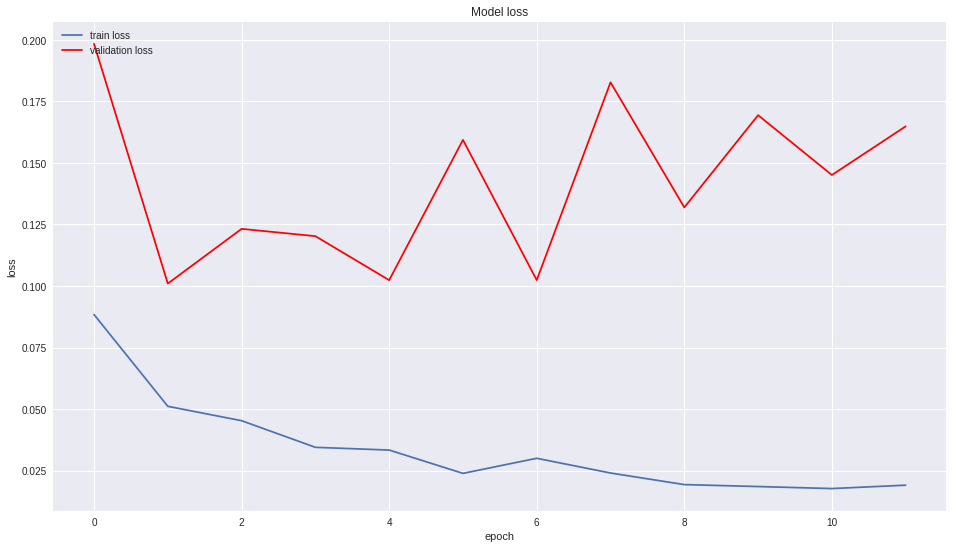

In [27]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [28]:
# Check the model summary
Trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 90, 300)           186000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               140400    
_________________________________________________________________
dense (Dense)                (None, 20)                2020      
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 328,441
Trainable params: 328,441
Non-trainable params: 0
_________________________________________________________________


In [30]:
# apply transform to test dataset
validateX = pipe.transform(df_test[['Pt-47', 'Rt-92', 'Tt-128',
'Tavgt-201']])

validateX[0]

array([-0.40304514, -0.19242453, -0.78727046, -0.0310611 ])

In [32]:
# Let’s standardize data
validateY = scaler.transform(df_test[['Q']])
validateY[0]

array([-0.51253179])

In [33]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(len(x_test_multi))

Single window of past history
[[-0.40304514 -0.19242453 -0.78727046 -0.0310611 ]
 [-0.27593301 -0.22176302 -0.71216304 -0.05972194]
 [-0.23691984 -0.23370688 -0.67528175 -0.08388596]
 [-0.65003464 -0.2538932  -0.64594382 -0.11009989]
 [-0.77212871 -0.26076753 -0.57490015 -0.13721454]
 [-0.50512284 -0.28279331 -0.21177136 -0.16474886]
 [-0.52353614 -0.29954652  0.02675629 -0.18874043]
 [-0.75813544 -0.31531689 -0.3001649  -0.21004082]
 [-1.10389714 -0.33209219  0.1106289  -0.22653381]
 [-1.25515486 -0.34760793  0.23814467 -0.24273101]
 [-1.88751688 -0.37799559  0.270822   -0.25995518]
 [-1.28102275 -0.39427623  0.21537451 -0.27476924]
 [-1.44368099 -0.40587814 -0.22333827 -0.2913031 ]
 [-1.33754206 -0.41927194  0.01485449 -0.31126811]
 [-1.13482153 -0.43934455 -0.13213671 -0.33100439]
 [-1.21283105 -0.4597652   0.15716089 -0.35078678]
 [-0.86901931 -0.4773293   0.31830203 -0.37412958]
 [-0.79449251 -0.50702227  0.32936462 -0.39970611]
 [-0.90682504 -0.53563065  0.38192936 -0.42543026]
 

In [34]:
# hold back 455 days data from test DataFrame to be used for testing the model
# validate DataFrame
validate = df_test[['Pt-47', 'Rt-92', 'Tt-128', 'Tavgt-201',
'Q']].tail(548)

In [35]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions)

[array([[-0.70963407]], dtype=float32), array([[-0.70681715]], dtype=float32), array([[-0.7039207]], dtype=float32), array([[-0.7015246]], dtype=float32), array([[-0.6968226]], dtype=float32), array([[-0.690794]], dtype=float32), array([[-0.68633133]], dtype=float32), array([[-0.6822064]], dtype=float32), array([[-0.6770834]], dtype=float32), array([[-0.67201966]], dtype=float32), array([[-0.66745317]], dtype=float32), array([[-0.66133195]], dtype=float32), array([[-0.6589833]], dtype=float32), array([[-0.65492725]], dtype=float32), array([[-0.6522484]], dtype=float32), array([[-0.6496687]], dtype=float32), array([[-0.64612395]], dtype=float32), array([[-0.6446823]], dtype=float32), array([[-0.6447995]], dtype=float32), array([[-0.6456878]], dtype=float32), array([[-0.64409286]], dtype=float32), array([[-0.64211047]], dtype=float32), array([[-0.64037997]], dtype=float32), array([[-0.6383561]], dtype=float32), array([[-0.6360879]], dtype=float32), array([[-0.6318757]], dtype=float32), a

In [36]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(548, 1)


In [37]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[2488.572]
(548, 1)


In [ ]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(548).values.reshape(-1, 1),predictions_Inv_trans)

In [ ]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans))
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [39]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(548).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.74882299]
KGE' is : [0.74530169]
r is : [0.95229016], gamma is : [0.99578647]
KGE is : [0.64669685]
alpha is : [1.24488699], beta is : [1.25015444]
PBIAS is : [-25.01544439]
RMSE is : 2862.841462240701
MARE is : [0.32848267]
MSE is : 8195861.237924475
MAE is : 2018.566445676038
MAPE is : 47.24849810300431
R2 is : 0.7488229909730062



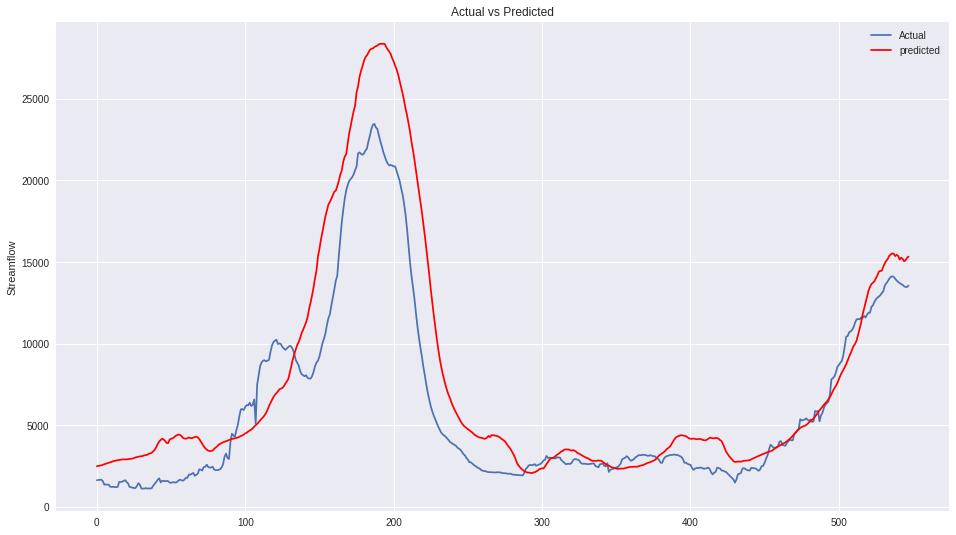

In [40]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [41]:
# import all libraries and modules
import tensorflow as tf
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
# import seaborn as sns   # for data visualisation
import matplotlib.pyplot as plt   # for plotting graph
%matplotlib inline 
# matplotlib inline ensures command in cells bellow the cell that outputs a plot does not affect the plot
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import warnings   # to ignore warnings
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn import set_config
import hydroeval as he

In [42]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,4))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', MinMaxScaler(),slice(0,4))
    ],remainder='passthrough')

In [43]:
pipe = Pipeline([('trf1', trf1),('trf2', trf2)])

In [44]:
#fit data
pipe.fit(df_copy[['Pt-47', 'Rt-92', 'Tt-128', 'Tavgt-201']])

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  slice(0, 4, None))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, 4, None))]))])

In [45]:
# apply transform to train dataset
dataX = pipe.transform(df_copy[['Pt-47', 'Rt-92', 'Tt-128', 'Tavgt-201']])

dataX

array([[0.43298471, 0.47825408, 0.50606136, 0.49485321],
       [0.43703908, 0.47695188, 0.53056918, 0.49351813],
       [0.41927745, 0.47599974, 0.5232198 , 0.49213617],
       ...,
       [0.48086731, 0.48631914, 0.43188928, 0.50233429],
       [0.49883861, 0.48449165, 0.42761169, 0.50079943],
       [0.47655279, 0.48272939, 0.41889121, 0.49897414]])

In [46]:
scaler = MinMaxScaler()
scaler.fit(df_copy[['Q']])

MinMaxScaler()

In [47]:
# Let’s standardize data
dataY = scaler.transform(df_copy[['Q']])
dataY

array([[0.09691053],
       [0.09177957],
       [0.08835892],
       ...,
       [0.09732688],
       [0.09676185],
       [0.09563181]])

In [48]:
# let’s allow the model to see / train on the past 91 days of data 
# and try to forecast the next 1 day of results. Hence, use horizon = 1
# This is called Single step Forecast
hist_window = 90 #91
horizon = 1
TRAIN_SPLIT = 2809 # 2737 # 2326 # 2809
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])
print(len(x_train_multi))
print(len(x_val_multi))

Single window of past history
[[0.43298471 0.47825408 0.50606136 0.49485321]
 [0.43703908 0.47695188 0.53056918 0.49351813]
 [0.41927745 0.47599974 0.5232198  0.49213617]
 [0.41323376 0.4747706  0.4741554  0.49097927]
 [0.38776743 0.47336907 0.45489077 0.4894984 ]
 [0.41913581 0.47173686 0.4589926  0.48789202]
 [0.41079657 0.4704501  0.45754451 0.48663299]
 [0.38733567 0.46938471 0.44287934 0.48566192]
 [0.4223928  0.46868173 0.44707874 0.48466648]
 [0.45004329 0.46854368 0.45725959 0.4832412 ]
 [0.42348298 0.46713563 0.47313155 0.48153125]
 [0.42708834 0.46533914 0.48164422 0.48004623]
 [0.45618225 0.46338499 0.49197312 0.47896444]
 [0.40373232 0.46147094 0.52602467 0.47786135]
 [0.40542937 0.46110121 0.53449167 0.4763843 ]
 [0.39162894 0.46077848 0.51647162 0.47496328]
 [0.41669051 0.45975743 0.49697912 0.47373667]
 [0.41132088 0.45909683 0.52016604 0.4722698 ]
 [0.40657219 0.45801725 0.52633861 0.47053684]
 [0.40127119 0.4534972  0.52505546 0.46855758]
 [0.40666516 0.451034   0.4975

In [49]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [50]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
tf.keras.layers.Dense(20, activation='tanh'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [51]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/lokoja_models/lokoja_q/Bidirectional_LSTM_Multi_Lokoja_Q_1step_90days_new_1.h5'

In [52]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 18s 90ms/step - loss: 0.0302 - val_loss: 0.0078
Epoch 2/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0068 - val_loss: 0.0109
Epoch 3/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0039 - val_loss: 0.0060
Epoch 4/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0038 - val_loss: 0.0133
Epoch 5/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0038 - val_loss: 0.0051
Epoch 6/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 7/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0030 - val_loss: 0.0066
Epoch 8/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0027 - val_loss: 0.0042
Epoch 9/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 10/100
150/150 [==============================] - 12s 81ms/step - l

In [53]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

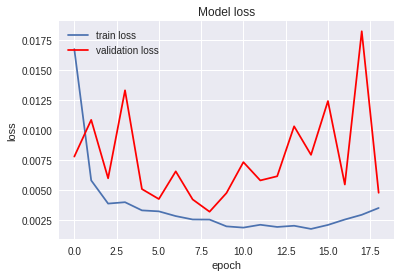

In [54]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [55]:
# Check the model summary
Trained_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 90, 300)           186000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100)               140400    
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 328,441
Trainable params: 328,441
Non-trainable params: 0
_________________________________________________________________


In [56]:
# apply transform to test dataset
validateX = pipe.transform(df_test[['Pt-47', 'Rt-92', 'Tt-128',
'Tavgt-201']])

validateX[0]

array([0.46102183, 0.48135704, 0.42393184, 0.49700108])

In [57]:
# Let’s standardize data
validateY = scaler.transform(df_test[['Q']])
validateY[0]

array([0.09450176])

In [58]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(len(x_test_multi))

Single window of past history
[[0.46102183 0.48135704 0.42393184 0.49700108]
 [0.47330727 0.47851878 0.43118831 0.49423081]
 [0.47707791 0.47736331 0.43475157 0.49189518]
 [0.43715019 0.47541045 0.43758604 0.48936141]
 [0.42534975 0.47474541 0.4444499  0.48674059]
 [0.45115598 0.47261459 0.47953341 0.48407919]
 [0.44937632 0.47099386 0.50257865 0.48176024]
 [0.4267022  0.4694682  0.47099331 0.4797014 ]
 [0.39328419 0.46784533 0.51068196 0.47810723]
 [0.37866507 0.4663443  0.52300184 0.47654166]
 [0.31754702 0.46340454 0.52615894 0.47487681]
 [0.37616493 0.46182952 0.52080191 0.47344493]
 [0.36044394 0.46070713 0.47841588 0.47184681]
 [0.37070231 0.45941139 0.50142876 0.46991705]
 [0.39029534 0.45746953 0.48722728 0.46800939]
 [0.38275568 0.455494   0.51517763 0.46609728]
 [0.41598523 0.45379481 0.53074621 0.46384103]
 [0.42318828 0.45092226 0.53181501 0.46136887]
 [0.41233129 0.44815463 0.53689353 0.45888245]
 [0.37581354 0.44559937 0.54137235 0.45605981]
 [0.41226147 0.4432156  0.5136

In [59]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions)

[array([[0.05495334]], dtype=float32), array([[0.05522163]], dtype=float32), array([[0.0560568]], dtype=float32), array([[0.05653732]], dtype=float32), array([[0.05694622]], dtype=float32), array([[0.05756321]], dtype=float32), array([[0.05859349]], dtype=float32), array([[0.06014192]], dtype=float32), array([[0.06069814]], dtype=float32), array([[0.061917]], dtype=float32), array([[0.06329536]], dtype=float32), array([[0.06507989]], dtype=float32), array([[0.06649856]], dtype=float32), array([[0.06732516]], dtype=float32), array([[0.06840099]], dtype=float32), array([[0.06917829]], dtype=float32), array([[0.07051976]], dtype=float32), array([[0.07163846]], dtype=float32), array([[0.07281084]], dtype=float32), array([[0.07438841]], dtype=float32), array([[0.07585528]], dtype=float32), array([[0.07643316]], dtype=float32), array([[0.07651941]], dtype=float32), array([[0.07729434]], dtype=float32), array([[0.07814367]], dtype=float32), array([[0.07937992]], dtype=float32), array([[0.0808

In [60]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(548, 1)


In [61]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[2517.1245]
(548, 1)


In [62]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(548).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.6617356]
KGE' is : [0.65724715]
r is : [0.95919151], gamma is : [0.9796245]
KGE is : [0.53668308]
alpha is : [1.31240714], beta is : [1.33970431]
PBIAS is : [-33.9704312]
RMSE is : 3322.274437088343
MARE is : [0.37012307]
MSE is : 11037507.435330665
MAE is : 2274.4517924715587
MAPE is : 50.29174360708755
R2 is : 0.661735597487783



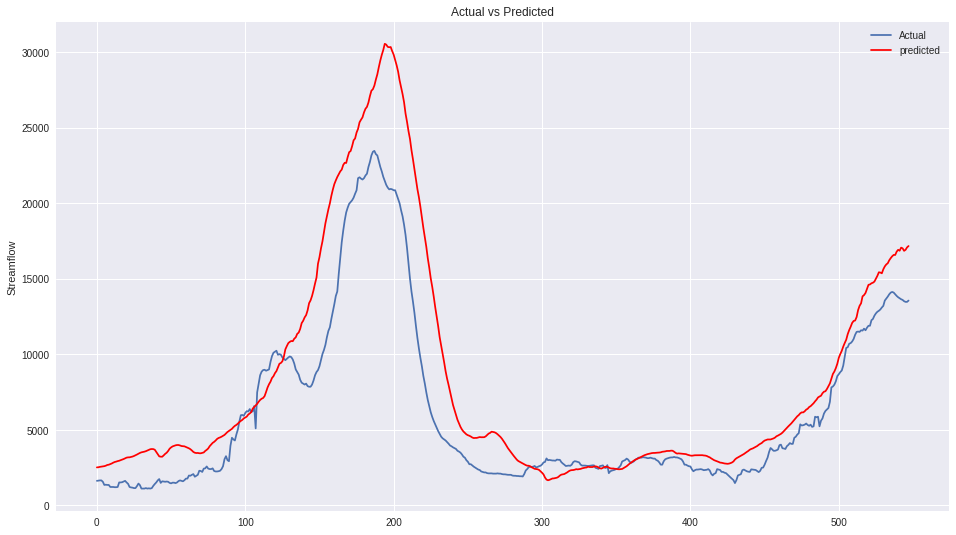

In [63]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [64]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/lokoja_models/lokoja_q/Bidirectional_LSTM_Multi_Lokoja_Q_1step_90days_new_2.h5'

In [65]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 13s 83ms/step - loss: 0.0030 - val_loss: 0.0059
Epoch 2/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0016 - val_loss: 0.0055
Epoch 3/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0018 - val_loss: 0.0072
Epoch 4/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 5/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0013 - val_loss: 0.0111
Epoch 6/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0015 - val_loss: 0.0056
Epoch 7/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0016 - val_loss: 0.0105
Epoch 8/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0019 - val_loss: 0.0061
Epoch 9/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0018 - val_loss: 0.0115
Epoch 10/100
150/150 [==============================] - 12s 81ms/step - l

In [66]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

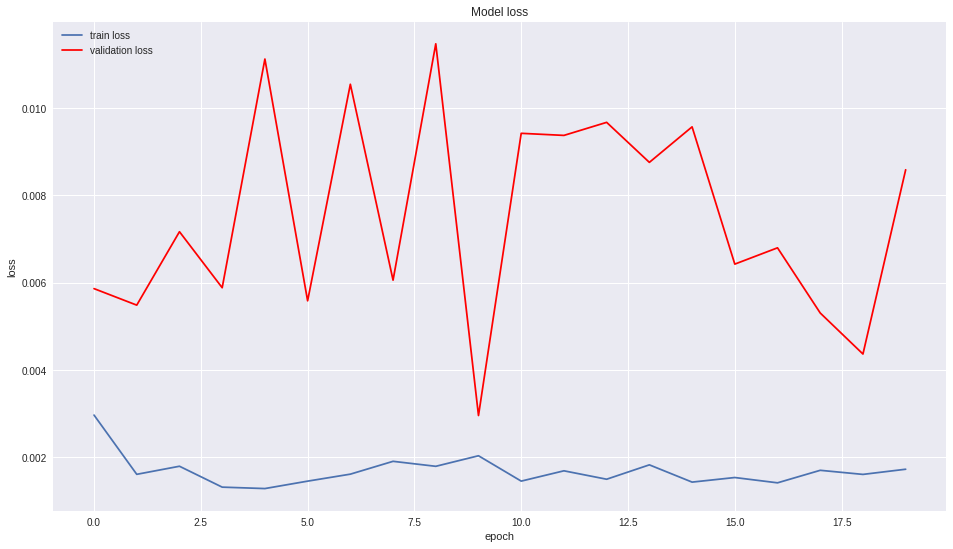

In [67]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [68]:
# Check the model summary
Trained_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 90, 300)           186000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100)               140400    
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 328,441
Trainable params: 328,441
Non-trainable params: 0
_________________________________________________________________


In [69]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.06169889]]


In [70]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(548, 1)


In [71]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[2725.3687]
(548, 1)


In [72]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(548).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.58478542]
KGE' is : [0.61923244]
r is : [0.97185385], gamma is : [1.02375011]
KGE is : [0.43969264]
alpha is : [1.41173351], beta is : [1.3789824]
PBIAS is : [-37.8982401]
RMSE is : 3680.8121278461335
MARE is : [0.4103572]
MSE is : 13548377.920499181
MAE is : 2521.695496690736
MAPE is : 50.079270520985155
R2 is : 0.5847854246858704



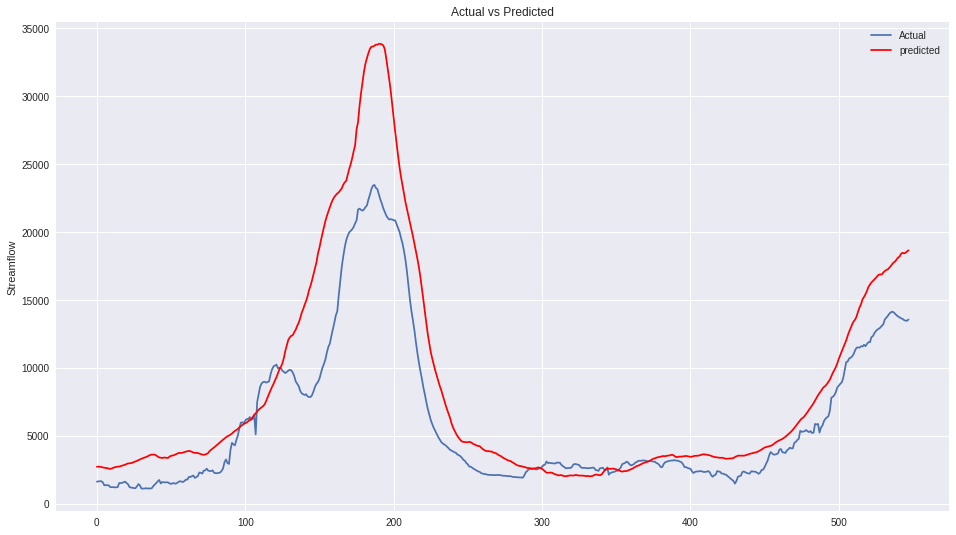

In [73]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [74]:
# make a copy of the Dataframe
df_copy = df.copy()
df_copy

,date,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
0,2010-01-01,0.072037,156.571559,28.987926,28.117374,3812.4
1,2010-01-02,0.089553,150.598723,29.642680,28.082433,3654.0
2,2010-01-03,0.036683,146.712922,29.432682,28.046663,3548.4
3,2010-01-04,0.028654,141.286889,28.161370,28.009195,3425.2
4,2010-01-05,0.012936,135.644590,27.521034,27.966300,3390.0
...,...,...,...,...,...,...
4286,2021-09-26,14.207973,810.579419,32.813480,30.667623,13598.4
4287,2021-09-27,18.250408,807.736935,33.009026,30.663124,13511.2
4288,2021-09-28,15.165197,808.004420,33.354347,30.661593,13467.6
4289,2021-09-29,10.338213,811.412505,33.514570,30.663618,13467.6


In [75]:
# convert to datetime object
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = False)
df_copy

,date,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
0,2010-01-01,0.072037,156.571559,28.987926,28.117374,3812.4
1,2010-01-02,0.089553,150.598723,29.642680,28.082433,3654.0
2,2010-01-03,0.036683,146.712922,29.432682,28.046663,3548.4
3,2010-01-04,0.028654,141.286889,28.161370,28.009195,3425.2
4,2010-01-05,0.012936,135.644590,27.521034,27.966300,3390.0
...,...,...,...,...,...,...
4286,2021-09-26,14.207973,810.579419,32.813480,30.667623,13598.4
4287,2021-09-27,18.250408,807.736935,33.009026,30.663124,13511.2
4288,2021-09-28,15.165197,808.004420,33.354347,30.661593,13467.6
4289,2021-09-29,10.338213,811.412505,33.514570,30.663618,13467.6


In [76]:
# Create a timestamp series
timestamp_s = df_copy.date.map(datetime.datetime.timestamp)
timestamp_s

0       1.262304e+09
1       1.262390e+09
2       1.262477e+09
3       1.262563e+09
4       1.262650e+09
            ...     
4286    1.632614e+09
4287    1.632701e+09
4288    1.632787e+09
4289    1.632874e+09
4290    1.632960e+09
Name: date, Length: 4291, dtype: float64

In [77]:
# Create np.sin and np.cos columns for Monthly, Quarterly and Yearly Cycle
day = 24*60*60
month = (30.436875)*day
season = (91.310625)*day
year = (365.2425)*day

#df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
#df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_copy['Month sin'] = np.sin(timestamp_s * (2 * np.pi / month))
df_copy['Month cos'] = np.cos(timestamp_s * (2 * np.pi / month))
df_copy['Season sin'] = np.sin(timestamp_s * (2 * np.pi / season))
df_copy['Season cos'] = np.cos(timestamp_s * (2 * np.pi / season))
df_copy['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_copy['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
df_copy.head()

,date,Pt-47,Rt-92,Tt-128,Tavgt-201,Q,Month sin,Month cos,Season sin,Season cos,Year sin,Year cos
0,2010-01-01,0.072037,156.571559,28.987926,28.117374,3812.4,0.061890,0.998083,0.020642,0.999787,0.005161,0.999987
1,2010-01-02,0.089553,150.598723,29.642680,28.082433,3654.0,0.265154,0.964206,0.089335,0.996002,0.022362,0.999750
2,2010-01-03,0.036683,146.712922,29.432682,28.046663,3548.4,0.457158,0.889386,0.157606,0.987502,0.039556,0.999217
3,2010-01-04,0.028654,141.286889,28.161370,28.009195,3425.2,0.629749,0.776799,0.225130,0.974329,0.056739,0.998389
4,2010-01-05,0.012936,135.644590,27.521034,27.966300,3390.0,0.775599,0.631226,0.291589,0.956544,0.073904,0.997265


Text(0.5, 1.0, 'Month of year signal')

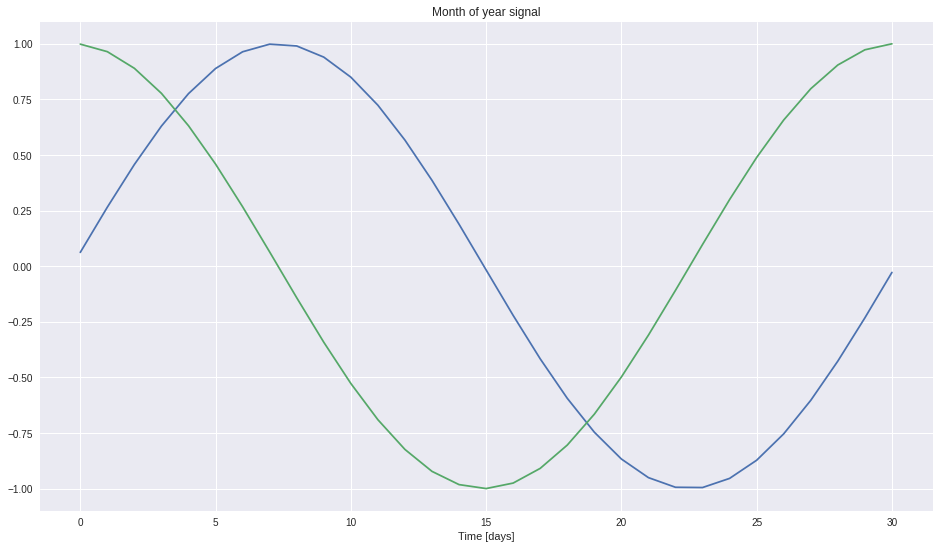

In [78]:
plt.plot(np.array(df_copy['Month sin'])[:31])
plt.plot(np.array(df_copy['Month cos'])[:31])
plt.xlabel('Time [days]')
plt.title('Month of year signal')

Text(0.5, 1.0, 'Quarter of year signal')

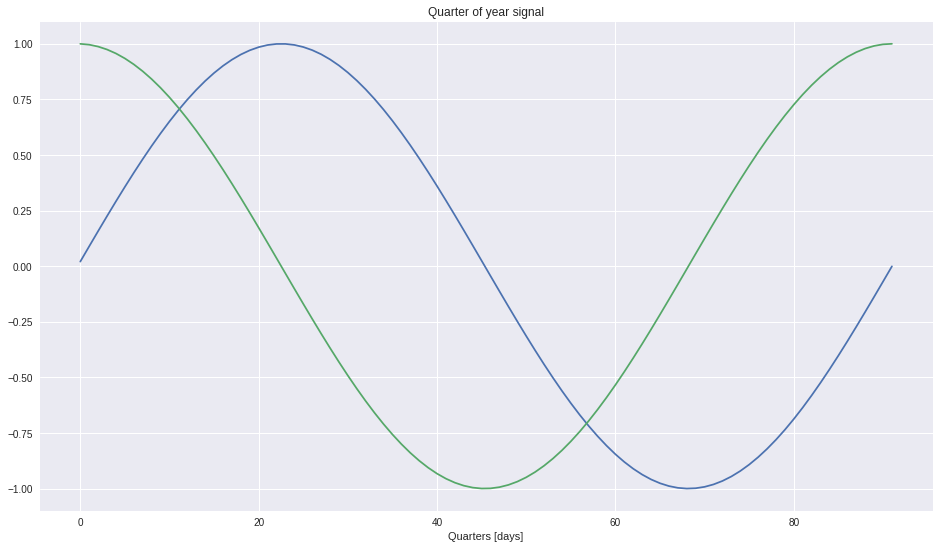

In [79]:
plt.plot(np.array(df_copy['Season sin'])[:92])
plt.plot(np.array(df_copy['Season cos'])[:92])
plt.xlabel('Quarters [days]')
plt.title('Quarter of year signal')

Text(0.5, 1.0, 'Time of day signal')

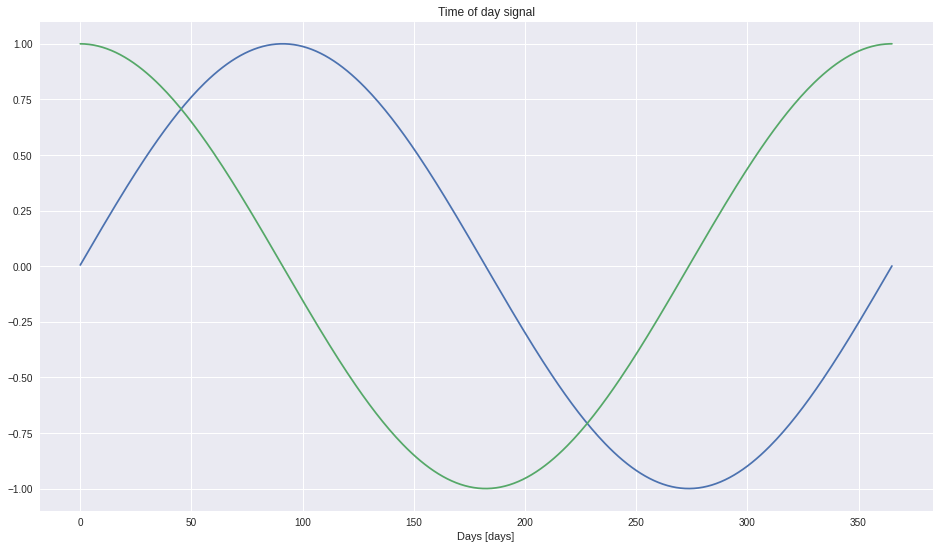

In [80]:
plt.plot(np.array(df_copy['Year sin'])[:366])
plt.plot(np.array(df_copy['Year cos'])[:366])
plt.xlabel('Days [days]')
plt.title('Time of day signal')

In [81]:
# get summary statistics
df_copy.describe()

,Pt-47,Rt-92,Tt-128,Tavgt-201,Q,Month sin,Month cos,Season sin,Season cos,Year sin,Year cos
count,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000
mean,3.674196,338.652679,28.325601,28.337924,6780.002985,0.000014,-0.000139,0.000005,-0.000140,0.013733,-0.013499
std,4.604213,311.435155,3.262036,1.477019,6237.500794,0.707238,0.707141,0.707238,0.707140,0.706973,0.707143
min,0.000033,1.322319,17.717693,25.897066,820.640000,-1.000000,-1.000000,-1.000000,-0.999999,-1.000000,-1.000000
25%,0.060465,39.954488,26.402673,26.956178,2642.000000,-0.707209,-0.707688,-0.706426,-0.707688,-0.694835,-0.718347
50%,1.482872,243.175440,28.782104,28.249256,3495.600000,0.000258,-0.000548,0.000774,-0.001150,0.032250,-0.032239
75%,6.087611,628.230218,30.650379,29.777874,9142.694960,0.707301,0.706228,0.706426,0.707156,0.718355,0.695074
max,34.247310,995.638312,34.878845,30.764437,31692.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
# get datetime statistics
df_copy.date.describe()

<ipython-input-82-230b203a077f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.date.describe()


count                    4291
unique                   4291
top       2010-01-01 00:00:00
freq                        1
first     2010-01-01 00:00:00
last      2021-09-30 00:00:00
Name: date, dtype: object

In [83]:
# set date as index
df_copy.set_index("date", inplace=True)
df_copy

,Pt-47,Rt-92,Tt-128,Tavgt-201,Q,Month sin,Month cos,Season sin,Season cos,Year sin,Year cos
date,,,,,,,,,,,
2010-01-01,0.072037,156.571559,28.987926,28.117374,3812.4,0.061890,0.998083,0.020642,0.999787,0.005161,0.999987
2010-01-02,0.089553,150.598723,29.642680,28.082433,3654.0,0.265154,0.964206,0.089335,0.996002,0.022362,0.999750
2010-01-03,0.036683,146.712922,29.432682,28.046663,3548.4,0.457158,0.889386,0.157606,0.987502,0.039556,0.999217
2010-01-04,0.028654,141.286889,28.161370,28.009195,3425.2,0.629749,0.776799,0.225130,0.974329,0.056739,0.998389
2010-01-05,0.012936,135.644590,27.521034,27.966300,3390.0,0.775599,0.631226,0.291589,0.956544,0.073904,0.997265
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26,14.207973,810.579419,32.813480,30.667623,13598.4,-0.888455,0.458964,-0.356628,0.934247,-0.995847,-0.091038
2021-09-27,18.250408,807.736935,33.009026,30.663124,13511.2,-0.775517,0.631326,-0.291548,0.956556,-0.997266,-0.073894
2021-09-28,15.165197,808.004420,33.354347,30.661593,13467.6,-0.629649,0.776880,-0.225088,0.974338,-0.998390,-0.056728


In [84]:
# Define a function to prepare multivariate data
# so that it is suitable for a time series.
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indicex = range(i-window, i)
        X.append(dataset[indicex])
        indicey = range(i-1, i-1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [85]:
# hold back the last two years (639 days) data to be used for testing the model
df_test = df_copy[['Pt-47', 'Rt-92', 'Tt-128', 'Tavgt-201',
'Q', 'Month sin', 'Month cos', 'Season sin', 'Season cos',
'Year sin', 'Year cos']].loc['2020-01-01':'2021-09-30']
df_copy.drop(df_copy.loc['2020-01-01':'2021-09-30'].index,inplace=True) # 639 days
df_copy

,Pt-47,Rt-92,Tt-128,Tavgt-201,Q,Month sin,Month cos,Season sin,Season cos,Year sin,Year cos
date,,,,,,,,,,,
2010-01-01,0.072037,156.571559,28.987926,28.117374,3812.400,0.061890,0.998083,0.020642,0.999787,0.005161,0.999987
2010-01-02,0.089553,150.598723,29.642680,28.082433,3654.000,0.265154,0.964206,0.089335,0.996002,0.022362,0.999750
2010-01-03,0.036683,146.712922,29.432682,28.046663,3548.400,0.457158,0.889386,0.157606,0.987502,0.039556,0.999217
2010-01-04,0.028654,141.286889,28.161370,28.009195,3425.200,0.629749,0.776799,0.225130,0.974329,0.056739,0.998389
2010-01-05,0.012936,135.644590,27.521034,27.966300,3390.000,0.775599,0.631226,0.291589,0.956544,0.073904,0.997265
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.842099,197.938007,27.348043,28.417000,3877.582,-0.871362,0.490641,-0.345392,0.938458,-0.088050,0.996116
2019-12-28,0.808608,192.716801,26.584631,28.372853,3842.696,-0.752294,0.658827,-0.280050,0.959986,-0.070902,0.997483
2019-12-29,0.716000,187.933494,26.287436,28.330293,3825.253,-0.601282,0.799037,-0.213381,0.976969,-0.053733,0.998555


In [86]:
# confirm the drop
df_copy.describe()

,Pt-47,Rt-92,Tt-128,Tavgt-201,Q,Month sin,Month cos,Season sin,Season cos,Year sin,Year cos
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3.652000e+03,3652.000000
mean,3.724959,342.755235,28.326120,28.328600,6987.067624,0.000010,-0.000116,0.000003,-0.000116,8.258124e-07,-0.000116
std,4.584397,308.649735,3.271674,1.487092,6340.044918,0.707244,0.707163,0.707245,0.707162,7.072448e-01,0.707162
min,0.000048,3.350540,18.470629,25.897066,820.640000,-1.000000,-1.000000,-1.000000,-0.999999,-9.999989e-01,-1.000000
25%,0.081485,42.264777,26.491793,26.943753,2703.600000,-0.707517,-0.706616,-0.706848,-0.706601,-7.073120e-01,-0.707171
50%,1.604551,255.337499,28.820077,28.266057,3618.800000,-0.000613,-0.000613,0.000140,-0.000140,9.138974e-04,-0.000075
75%,6.168955,631.621726,30.660097,29.782179,9545.761750,0.707232,0.706799,0.706707,0.706799,7.061901e-01,0.707019
max,34.247310,973.859648,34.878845,30.764437,31692.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000


In [87]:
# Display Pipeline
set_config(display='diagram')

In [88]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,-1))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', MinMaxScaler(),slice(0,-1))
    ],remainder='passthrough')

In [89]:
pipe = Pipeline([('trf1', trf1),('trf2', trf2)])

In [90]:
#fit data
pipe.fit(df_copy[['Pt-47', 'Rt-92', 'Tt-128',
'Tavgt-201', 'Month sin', 'Month cos', 'Season sin',
'Season cos', 'Year sin', 'Year cos']])

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  slice(0, -1, None))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, -1, None))]))])

In [91]:
# apply transform to train dataset
dataX = pipe.transform(df_copy[['Pt-47', 'Rt-92', 'Tt-128',
'Tavgt-201', 'Month sin', 'Month cos', 'Season sin',
'Season cos', 'Year sin', 'Year cos']])

dataX

array([[0.43298471, 0.47825408, 0.50606136, ..., 0.73999492, 0.50036219,
        0.99998668],
       [0.43703908, 0.47695188, 0.53056918, ..., 0.6834014 , 0.50169291,
        0.99974994],
       [0.41927745, 0.47599974, 0.5232198 , ..., 0.65793016, 0.50301198,
        0.99921735],
       ...,
       [0.48086731, 0.48631914, 0.43188928, ..., 0.64325257, 0.49584832,
        0.99855535],
       [0.49883861, 0.48449165, 0.42761169, ..., 0.66181144, 0.49724367,
        0.99933191],
       [0.47655279, 0.48272939, 0.41889121, ..., 0.68977565, 0.49850042,
        0.99981273]])

In [92]:
scaler = MinMaxScaler()
scaler.fit(df_copy[['Q']])

MinMaxScaler()

In [93]:
# Let’s standardize data
dataY = scaler.transform(df_copy[['Q']])
dataY

array([[0.09691053],
       [0.09177957],
       [0.08835892],
       ...,
       [0.09732688],
       [0.09676185],
       [0.09563181]])

In [94]:
# let’s allow the model to see / train on the past 91 days of data 
# and try to forecast the next 1 day of results. Hence, use horizon = 1
# This is called Single step Forecast
hist_window = 90 #91
horizon = 1
TRAIN_SPLIT = 2809 # 2737 # 2326 # 2809
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])
print(len(x_train_multi))
print(len(x_val_multi))

Single window of past history
[[0.43298471 0.47825408 0.50606136 0.49485321 0.50472943 0.69886396
  0.50158339 0.73999492 0.50036219 0.99998668]
 [0.43703908 0.47695188 0.53056918 0.49351813 0.52075722 0.63193345
  0.5068894  0.6834014  0.50169291 0.99974994]
 [0.41927745 0.47599974 0.5232198  0.49213617 0.53735555 0.59926668
  0.51220556 0.65793016 0.50301198 0.99921735]
 [0.41323376 0.4747706  0.4741554  0.49097927 0.55514405 0.57538764
  0.51749371 0.6403208  0.50432765 0.99838906]
 [0.38776743 0.47336907 0.45489077 0.4894984  0.57512239 0.55541042
  0.5228591  0.62649612 0.50566377 0.99726532]
 [0.41913581 0.47173686 0.4589926  0.48789202 0.59899837 0.53752805
  0.5283401  0.61487777 0.50696156 0.99584646]
 [0.41079657 0.4704501  0.45754451 0.48663299 0.63136332 0.52095531
  0.5339218  0.60476812 0.50831977 0.99413291]
 [0.38733567 0.46938471 0.44287934 0.48566192 0.6972134  0.50495797
  0.53962131 0.5956922  0.5096007  0.99212515]
 [0.4223928  0.46868173 0.44707874 0.48466648 0.66

In [95]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [96]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
tf.keras.layers.Dense(20, activation='tanh'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [97]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/lokoja_models/lokoja_q/Bidirectional_LSTM_Multi_Lokoja_Q_1step_90days_new_3.h5'

In [98]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 18s 90ms/step - loss: 0.0310 - val_loss: 0.0068
Epoch 2/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0057 - val_loss: 0.0118
Epoch 3/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0049 - val_loss: 0.0074
Epoch 4/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0032 - val_loss: 0.0053
Epoch 5/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0038 - val_loss: 0.0066
Epoch 6/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0034 - val_loss: 0.0113
Epoch 7/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0030 - val_loss: 0.0074
Epoch 8/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0023 - val_loss: 0.0046
Epoch 9/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0031 - val_loss: 0.0104
Epoch 10/100
150/150 [==============================] - 12s 82ms/step - l

In [99]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

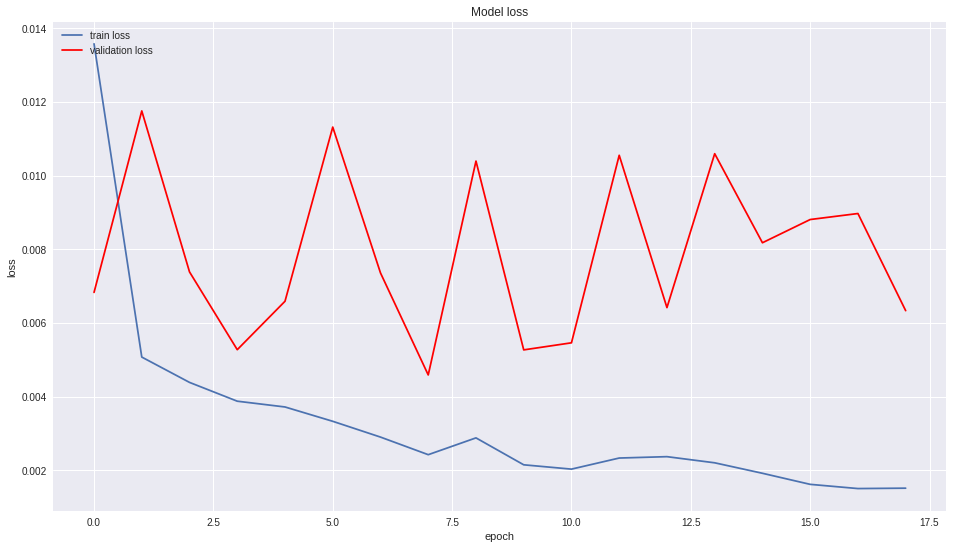

In [100]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [101]:
# Check the model summary
Trained_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 90, 300)           193200    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 100)               140400    
_________________________________________________________________
dense_4 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 335,641
Trainable params: 335,641
Non-trainable params: 0
_________________________________________________________________


In [102]:
# hold back 455 days data from test DataFrame to be used for testing the model
# validate DataFrame
validate = df_test[['Pt-47', 'Rt-92', 'Tt-128', 'Tavgt-201',
'Q']].tail(548)

In [103]:
# hold back 455 days data from test DataFrame to be used for testing the model
# validate DataFrame
validate = df_test[['Pt-47', 'Rt-92', 'Tt-128', 'Tavgt-201',
'Q', 'Month sin', 'Month cos', 'Season sin', 'Season cos',
'Year sin', 'Year cos']].tail(548)

In [104]:
# apply transform to test dataset
validateX = pipe.transform(df_test[['Pt-47', 'Rt-92', 'Tt-128',
'Tavgt-201', 'Month sin', 'Month cos', 'Season sin',
'Season cos', 'Year sin', 'Year cos']])

validateX

array([[ 0.46102183,  0.48135704,  0.42393184, ...,  0.77078959,
         0.49976609,  0.99999769],
       [ 0.47330727,  0.47851878,  0.43118831, ...,  0.69986161,
         0.50114678,  0.99988671],
       [ 0.47707791,  0.47736331,  0.43475157, ...,  0.66743716,
         0.50239647,  0.99947985],
       ...,
       [ 0.68764327,  0.62253286,  0.68703346, ...,  0.64033262,
         0.29784836, -0.05672794],
       [ 0.62050903,  0.62472556,  0.7005344 , ...,  0.65794541,
         0.28470718, -0.03954532],
       [ 0.60611911,  0.62523141,  0.67085951, ...,  0.6834258 ,
         0.26258019, -0.022351  ]])

In [105]:
# apply transform to test dataset
validateX = pipe.transform(df_test[['Pt-47', 'Rt-92', 'Tt-128',
'Tavgt-201', 'Month sin', 'Month cos', 'Season sin',
'Season cos', 'Year sin', 'Year cos']])

validateX[0]

array([0.46102183, 0.48135704, 0.42393184, 0.49700108, 0.49800821,
       0.73193525, 0.49931091, 0.77078959, 0.49976609, 0.99999769])

In [106]:
# Let’s standardize data
validateY = scaler.transform(df_test[['Q']])
validateY[0]

array([0.09450176])

In [107]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(len(x_test_multi))

Single window of past history
[[0.46102183 0.48135704 0.42393184 0.49700108 0.49800821 0.73193525
  0.49931091 0.77078959 0.49976609 0.99999769]
 [0.47330727 0.47851878 0.43118831 0.49423081 0.51389504 0.65182504
  0.50459079 0.69986161 0.50114678 0.99988671]
 [0.47707791 0.47736331 0.43475157 0.49189518 0.53018117 0.6116253
  0.50989895 0.66743716 0.50239647 0.99947985]
 [0.43715019 0.47541045 0.43758604 0.48936141 0.54739625 0.58487507
  0.51524744 0.64735456 0.5037978  0.9987772 ]
 [0.42534975 0.47474541 0.4444499  0.48674059 0.56627833 0.56353916
  0.52062094 0.63220209 0.50503837 0.99777899]
 [0.45115598 0.47261459 0.47953341 0.48407919 0.58816872 0.54495431
  0.52603944 0.61979557 0.50645063 0.99648551]
 [0.44937632 0.47099386 0.50257865 0.48176024 0.61600563 0.52788148
  0.53154438 0.60910762 0.50769223 0.99489715]
 [0.4267022  0.4694682  0.47099331 0.4797014  0.65994407 0.51169667
  0.53718879 0.59961451 0.50910736 0.99301436]
 [0.39328419 0.46784533 0.51068196 0.47810723 0.703

In [108]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.0555017]]


In [109]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(548, 1)


In [110]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[2534.053]
(548, 1)


In [111]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(548).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.62937075]
KGE' is : [0.62840667]
r is : [0.96798472], gamma is : [0.98844475]
KGE is : [0.48676917]
alpha is : [1.35420024], beta is : [1.37003122]
PBIAS is : [-37.00312178]
RMSE is : 3477.580587679956
MARE is : [0.39921468]
MSE is : 12093566.743808469
MAE is : 2453.2233675439097
MAPE is : 55.23359021567514
R2 is : 0.6293707476253732



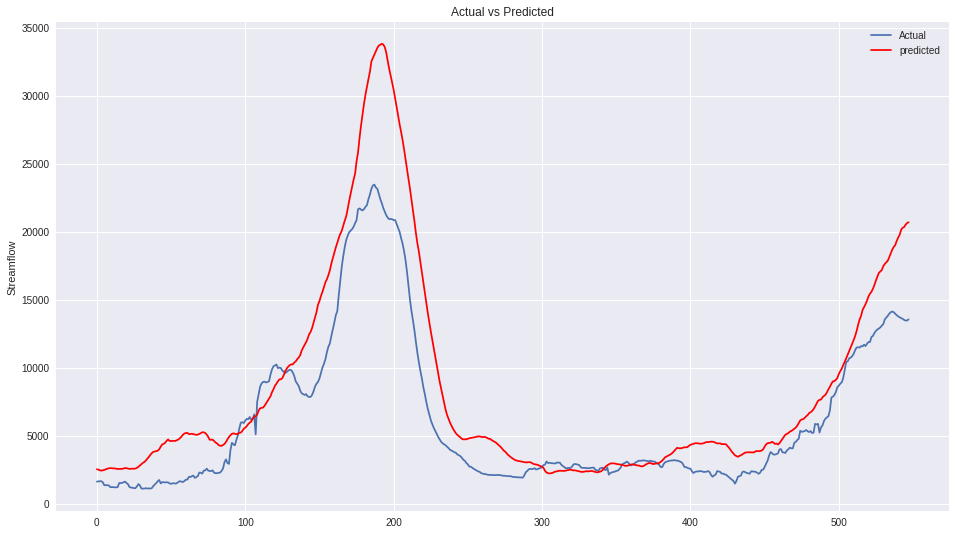

In [112]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [113]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,-1))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', StandardScaler(),slice(0,-1))
    ],remainder='passthrough')

In [114]:
pipe = Pipeline([('trf1', trf1),('trf2', trf2)])

In [115]:
#fit data
pipe.fit(df_copy[['Pt-47', 'Rt-92', 'Tt-128',
'Tavgt-201', 'Month sin', 'Month cos', 'Season sin',
'Season cos', 'Year sin', 'Year cos']])

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  slice(0, -1, None))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, -1, None))]))])

In [116]:
# apply transform to train dataset
dataX = pipe.transform(df_copy[['Pt-47', 'Rt-92', 'Tt-128',
'Tavgt-201', 'Month sin', 'Month cos', 'Season sin',
'Season cos', 'Year sin', 'Year cos']])

dataX[0]

array([-0.69313307, -0.22449918,  0.06280371, -0.05328266,  0.04891821,
        2.05467859,  0.01641858,  2.4754221 ,  0.00312511,  0.99998668])

In [117]:
scaler = StandardScaler()
scaler.fit(df_copy[['Q']])

StandardScaler()

In [118]:
# Let’s standardize data
dataY = scaler.transform(df_copy[['Q']])
dataY

array([[-0.50080124],
       [-0.52578871],
       [-0.54244703],
       ...,
       [-0.49877369],
       [-0.50152531],
       [-0.50702855]])

In [119]:
# let’s allow the model to see / train on the past 91 days of data 
# and try to forecast the next 1 day of results. Hence, use horizon = 1
# This is called Single step Forecast
hist_window = 90 #91
horizon = 1
TRAIN_SPLIT = 2809 # 2737 # 2326 # 2809
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])
print(len(x_train_multi))
print(len(x_val_multi))

Single window of past history
[[-0.69313307 -0.22449918  0.06280371 -0.05328266  0.04891821  2.05467859
   0.01641858  2.4754221   0.00312511  0.99998668]
 [-0.65118423 -0.23795974  0.31646975 -0.06709518  0.21461745  1.36320079
   0.07121072  1.89176846  0.01685291  0.99974994]
 [-0.83495614 -0.24780181  0.24040065 -0.08139273  0.38621513  1.02571121
   0.12610758  1.62908136  0.03046062  0.99921735]
 [-0.89748755 -0.2605072  -0.26743599 -0.09336177  0.57011708  0.77901013
   0.1807153   1.44747465  0.04403319  0.99838906]
 [-1.16097673 -0.27499444 -0.46683279 -0.10868263  0.77665814  0.57261991
   0.23612056  1.30489951  0.05781669  0.99726532]
 [-0.83642166 -0.29186621 -0.42437716 -0.12530202  1.023494    0.38787214
   0.29271974  1.18507851  0.07120483  0.99584646]
 [-0.92270414 -0.30516717 -0.43936555 -0.13832773  1.35809094  0.21665449
   0.35035873  1.08081683  0.0852163   0.99413291]
 [-1.16544397 -0.31617989 -0.59115609 -0.14837428  2.03886542  0.05138152
   0.40921427  0.9872

In [120]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [121]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
tf.keras.layers.Dense(20, activation='tanh'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [122]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/lokoja_models/lokoja_q/Bidirectional_LSTM_Multi_Lokoja_Q_1step_90days_new_4.h5'

In [123]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 18s 91ms/step - loss: 0.1491 - val_loss: 0.1827
Epoch 2/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0393 - val_loss: 0.2379
Epoch 3/100
150/150 [==============================] - 12s 83ms/step - loss: 0.0329 - val_loss: 0.1649
Epoch 4/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0280 - val_loss: 0.1362
Epoch 5/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0289 - val_loss: 0.1778
Epoch 6/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0172 - val_loss: 0.1545
Epoch 7/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0176 - val_loss: 0.1467
Epoch 8/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0188 - val_loss: 0.2029
Epoch 9/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0186 - val_loss: 0.1847
Epoch 10/100
150/150 [==============================] - 12s 82ms/step - l

In [124]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

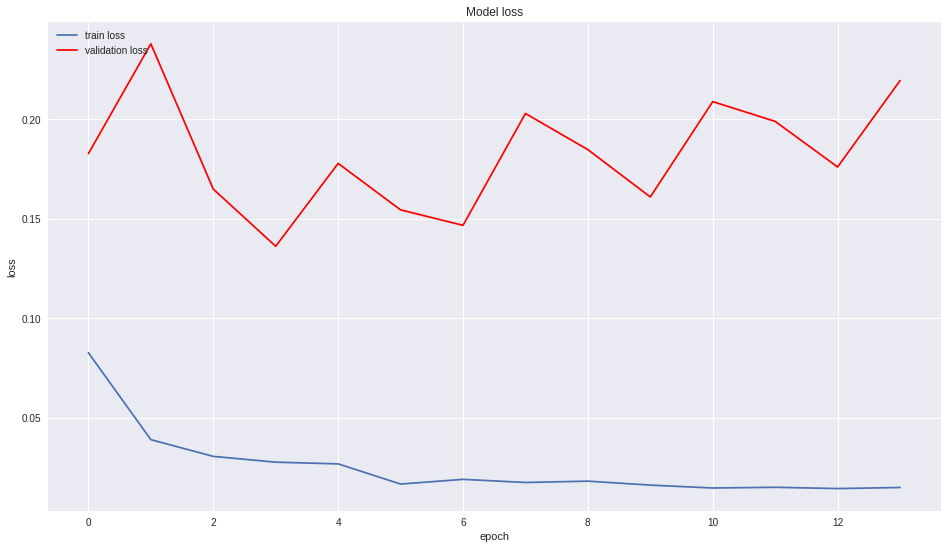

In [125]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [126]:
# Check the model summary
Trained_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 90, 300)           193200    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 100)               140400    
_________________________________________________________________
dense_6 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 335,641
Trainable params: 335,641
Non-trainable params: 0
_________________________________________________________________


In [127]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(len(x_test_multi))

Single window of past history
[[0.46102183 0.48135704 0.42393184 0.49700108 0.49800821 0.73193525
  0.49931091 0.77078959 0.49976609 0.99999769]
 [0.47330727 0.47851878 0.43118831 0.49423081 0.51389504 0.65182504
  0.50459079 0.69986161 0.50114678 0.99988671]
 [0.47707791 0.47736331 0.43475157 0.49189518 0.53018117 0.6116253
  0.50989895 0.66743716 0.50239647 0.99947985]
 [0.43715019 0.47541045 0.43758604 0.48936141 0.54739625 0.58487507
  0.51524744 0.64735456 0.5037978  0.9987772 ]
 [0.42534975 0.47474541 0.4444499  0.48674059 0.56627833 0.56353916
  0.52062094 0.63220209 0.50503837 0.99777899]
 [0.45115598 0.47261459 0.47953341 0.48407919 0.58816872 0.54495431
  0.52603944 0.61979557 0.50645063 0.99648551]
 [0.44937632 0.47099386 0.50257865 0.48176024 0.61600563 0.52788148
  0.53154438 0.60910762 0.50769223 0.99489715]
 [0.4267022  0.4694682  0.47099331 0.4797014  0.65994407 0.51169667
  0.53718879 0.59961451 0.50910736 0.99301436]
 [0.39328419 0.46784533 0.51068196 0.47810723 0.703

In [128]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-0.10545536]]


In [129]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(548, 1)


In [130]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[6318.5674]
(548, 1)


In [131]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(548).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.24601615]
KGE' is : [0.10670068]
r is : [0.85779562], gamma is : [0.26645759]
KGE is : [0.21030351]
alpha is : [0.39690682], beta is : [1.48956831]
PBIAS is : [-48.95683052]
RMSE is : 4960.076543943157
MARE is : [0.73407272]
MSE is : 24602359.321775094
MAE is : 4510.9671972371125
MAPE is : 158.98064131843688
R2 is : 0.2460161476555499



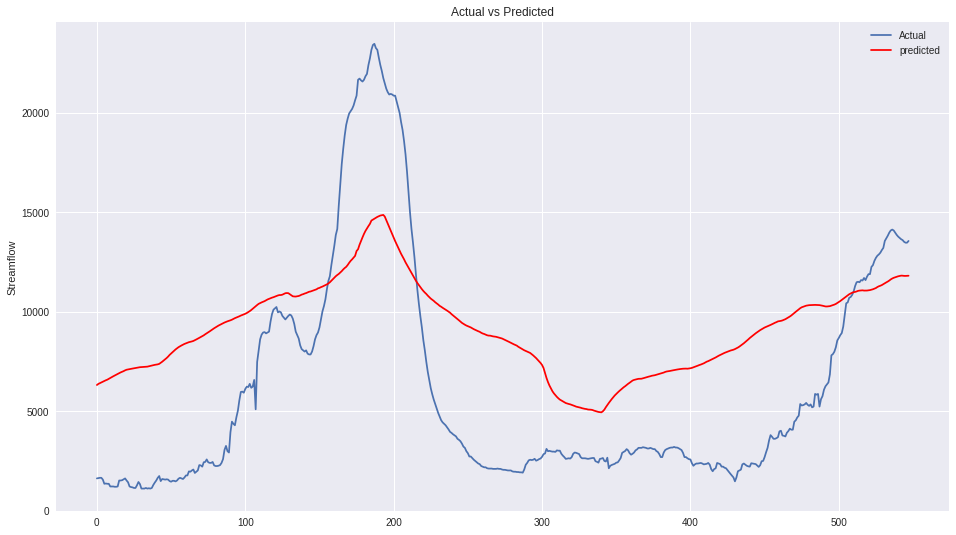

In [132]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [133]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,4))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', StandardScaler(),slice(0,4))
    ],remainder='passthrough')

In [134]:
pipe = Pipeline([('trf1', trf1),('trf2', trf2)])

In [135]:
#fit data
pipe.fit(df_copy[['Pt-47', 'Rt-92', 'Tt-128',
'Tavgt-201', 'Month sin', 'Month cos', 'Season sin',
'Season cos', 'Year sin', 'Year cos']])

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  slice(0, 4, None))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 4, None))]))])

In [136]:
# apply transform to train dataset
dataX = pipe.transform(df_copy[['Pt-47', 'Rt-92', 'Tt-128',
'Tavgt-201', 'Month sin', 'Month cos', 'Season sin',
'Season cos', 'Year sin', 'Year cos']])

dataX[0]

array([-0.69313307, -0.22449918,  0.06280371, -0.05328266,  0.06189042,
        0.99808295,  0.02064187,  0.99978693,  0.00516081,  0.99998668])

In [137]:
scaler = StandardScaler()
scaler.fit(df_copy[['Q']])

StandardScaler()

In [138]:
# Let’s standardize data
dataY = scaler.transform(df_copy[['Q']])
dataY

array([[-0.50080124],
       [-0.52578871],
       [-0.54244703],
       ...,
       [-0.49877369],
       [-0.50152531],
       [-0.50702855]])

In [139]:
# let’s allow the model to see / train on the past 91 days of data 
# and try to forecast the next 1 day of results. Hence, use horizon = 1
# This is called Single step Forecast
hist_window = 90 #91
horizon = 1
TRAIN_SPLIT = 2809 # 2737 # 2326 # 2809
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])
print(len(x_train_multi))
print(len(x_val_multi))

Single window of past history
[[-0.69313307 -0.22449918  0.06280371 -0.05328266  0.06189042  0.99808295
   0.02064187  0.99978693  0.00516081  0.99998668]
 [-0.65118423 -0.23795974  0.31646975 -0.06709518  0.2651537   0.96420616
   0.08933518  0.99600162  0.02236175  0.99974994]
 [-0.83495614 -0.24780181  0.24040065 -0.08139273  0.4571576   0.8893857
   0.15760567  0.98750213  0.03955606  0.99921735]
 [-0.89748755 -0.2605072  -0.26743599 -0.09336177  0.62974894  0.77679873
   0.22513019  0.97432869  0.05673868  0.99838906]
 [-1.16097673 -0.27499444 -0.46683279 -0.10868263  0.77559888  0.63122609
   0.29158915  0.95654366  0.0739045   0.99726532]
 [-0.83642166 -0.29186621 -0.42437716 -0.12530202  0.8885141   0.45884932
   0.35666799  0.93423121  0.09104845  0.99584646]
 [-0.92270414 -0.30516717 -0.43936555 -0.13832773  0.96369981  0.26698816
   0.42005868  0.90749694  0.10816546  0.99413291]
 [-1.16544397 -0.31617989 -0.59115609 -0.14837428  0.99796336  0.06378971
   0.48146119  0.87646

In [140]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [141]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
tf.keras.layers.Dense(20, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [142]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/lokoja_models/lokoja_q/Bidirectional_LSTM_Multi_Lokoja_Q_1step_90days_new_5.h5'

In [143]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 18s 91ms/step - loss: 0.2003 - val_loss: 0.1824
Epoch 2/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0540 - val_loss: 0.2296
Epoch 3/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0495 - val_loss: 0.2307
Epoch 4/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0396 - val_loss: 0.2114
Epoch 5/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0367 - val_loss: 0.2002
Epoch 6/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0330 - val_loss: 0.2164
Epoch 7/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0339 - val_loss: 0.2103
Epoch 8/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0289 - val_loss: 0.2360
Epoch 9/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0286 - val_loss: 0.1788
Epoch 10/100
150/150 [==============================] - 12s 82ms/step - l

In [144]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

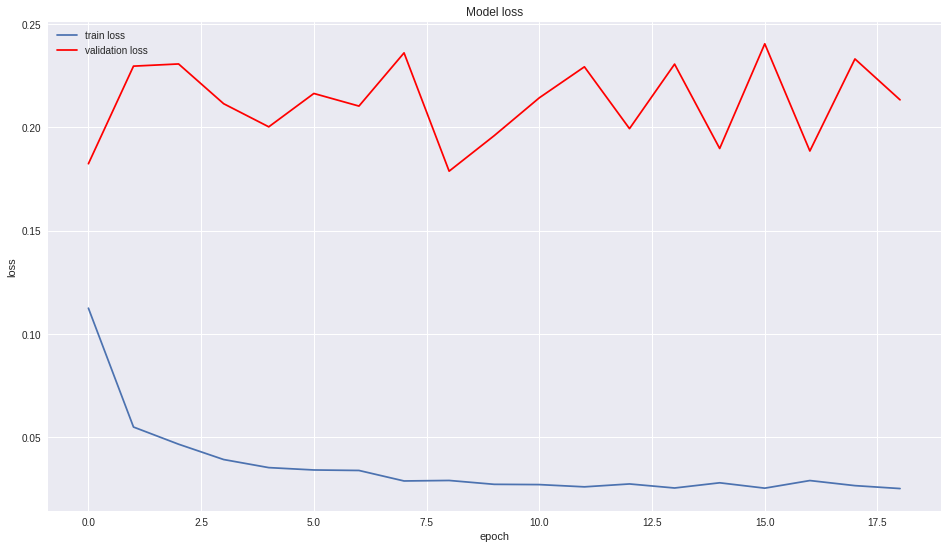

In [145]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [146]:
# apply transform to test dataset
validateX = pipe.transform(df_test[['Pt-47', 'Rt-92', 'Tt-128',
'Tavgt-201', 'Month sin', 'Month cos', 'Season sin',
'Season cos', 'Year sin', 'Year cos']])

validateX[0]

array([-0.40304514, -0.19242453, -0.78727046, -0.0310611 , -0.0258013 ,
        0.99966709, -0.00860128,  0.99996301, -0.00215035,  0.99999769])

In [147]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(len(x_test_multi))

Single window of past history
[[-4.03045144e-01 -1.92424528e-01 -7.87270463e-01 -3.10611044e-02
  -2.58013021e-02  9.99667091e-01 -8.60128248e-03  9.99963008e-01
  -2.15034548e-03  9.99997688e-01]
 [-2.75933008e-01 -2.21763020e-01 -7.12163041e-01 -5.97219417e-02
   1.79648532e-01  9.83730860e-01  6.01733476e-02  9.98187942e-01
   1.50518615e-02  9.99886714e-01]
 [-2.36919837e-01 -2.33706875e-01 -6.75281751e-01 -8.38859559e-02
   3.77469844e-01  9.26021877e-01  1.28663171e-01  9.91688352e-01
   3.22496143e-02  9.99479846e-01]
 [-6.50034643e-01 -2.53893204e-01 -6.45943822e-01 -1.10099887e-01
   5.59262428e-01  8.28990674e-01  1.96544019e-01  9.80495002e-01
   4.94378234e-02  9.98777203e-01]
 [-7.72128708e-01 -2.60767529e-01 -5.74900150e-01 -1.37214542e-01
   7.17306716e-01  6.96757544e-01  2.63494604e-01  9.64660870e-01
   6.66114026e-02  9.97778994e-01]
 [-5.05122841e-01 -2.82793312e-01 -2.11771362e-01 -1.64748857e-01
   8.44891581e-01  5.34937581e-01  3.29198043e-01  9.44260901e-01
   

In [148]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-0.7096358]]


In [149]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(548, 1)


In [150]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[2488.5608]
(548, 1)


In [151]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(548).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.83595196]
KGE' is : [0.82869661]
r is : [0.96359795], gamma is : [1.0451278]
KGE is : [0.72994218]
alpha is : [1.21359515], beta is : [1.16119313]
PBIAS is : [-16.11931314]
RMSE is : 2313.624505037195
MARE is : [0.27620385]
MSE is : 5352858.350308605
MAE is : 1697.3066431127393
MAPE is : 37.33701967944314
R2 is : 0.8359519626864536



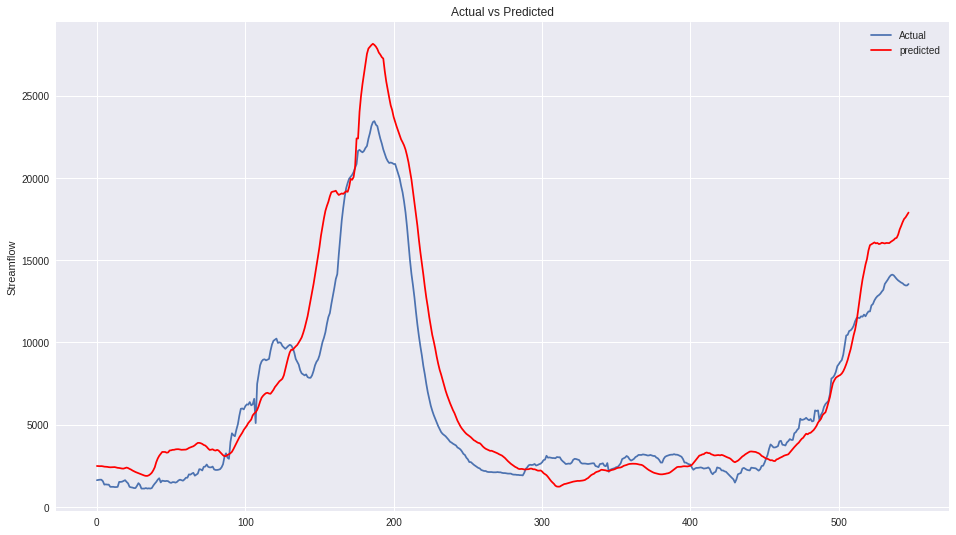

In [152]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [153]:
# save train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/lokoja_models/lokoja_q/Bidirectional_LSTM_Multi_Lokoja_Q_1step_90days_dates_relu_best.csv', index=False)

In [154]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
tf.keras.layers.Dense(20, activation='elu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [155]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/lokoja_models/lokoja_q/Bidirectional_LSTM_Multi_Lokoja_Q_1step_90days_elu.h5'

In [156]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 18s 91ms/step - loss: 0.1451 - val_loss: 0.1381
Epoch 2/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0379 - val_loss: 0.2302
Epoch 3/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0355 - val_loss: 0.1331
Epoch 4/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0254 - val_loss: 0.1865
Epoch 5/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0230 - val_loss: 0.2070
Epoch 6/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0193 - val_loss: 0.1848
Epoch 7/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0178 - val_loss: 0.1874
Epoch 8/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0177 - val_loss: 0.1310
Epoch 9/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0203 - val_loss: 0.1578
Epoch 10/100
150/150 [==============================] - 12s 82ms/step - l

In [157]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

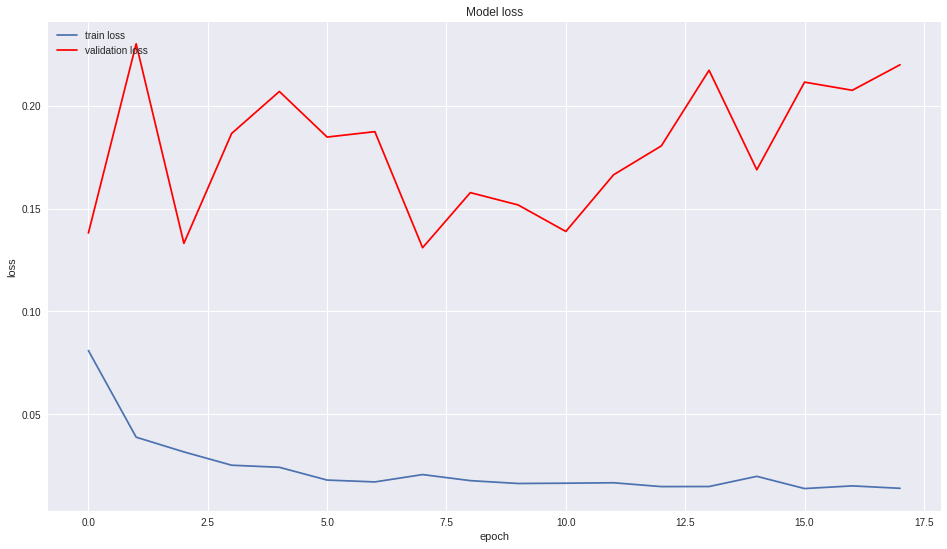

In [158]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [159]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-0.6396719]]


In [160]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(548, 1)


In [161]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[2932.0742]
(548, 1)


In [162]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(548).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.82552883]
KGE' is : [0.78058273]
r is : [0.9618212], gamma is : [0.97006172]
KGE is : [0.71927932]
alpha is : [1.17764139], beta is : [1.21398602]
PBIAS is : [-21.39860197]
RMSE is : 2385.993185736159
MARE is : [0.27792355]
MSE is : 5692963.482379384
MAE is : 1707.8744490868785
MAPE is : 42.44955417790489
R2 is : 0.8255288250382735



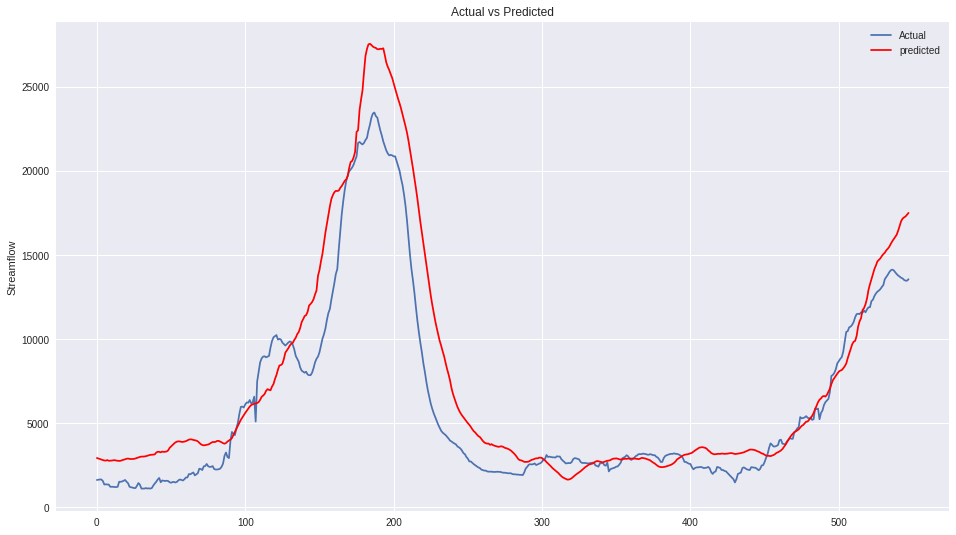

In [163]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [164]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/lokoja_models/lokoja_q/Bidirectional_LSTM_Multi_Lokoja_Q_1step_90days_dates_relu.h5'

In [165]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
tf.keras.layers.Dense(20, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [166]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 18s 90ms/step - loss: 0.1763 - val_loss: 0.2129
Epoch 2/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0611 - val_loss: 0.1187
Epoch 3/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0465 - val_loss: 0.1871
Epoch 4/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0334 - val_loss: 0.1462
Epoch 5/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0317 - val_loss: 0.1473
Epoch 6/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0333 - val_loss: 0.1968
Epoch 7/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0253 - val_loss: 0.1963
Epoch 8/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0273 - val_loss: 0.1819
Epoch 9/100
150/150 [==============================] - 12s 82ms/step - loss: 0.0237 - val_loss: 0.1880
Epoch 10/100
150/150 [==============================] - 12s 82ms/step - l

In [167]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

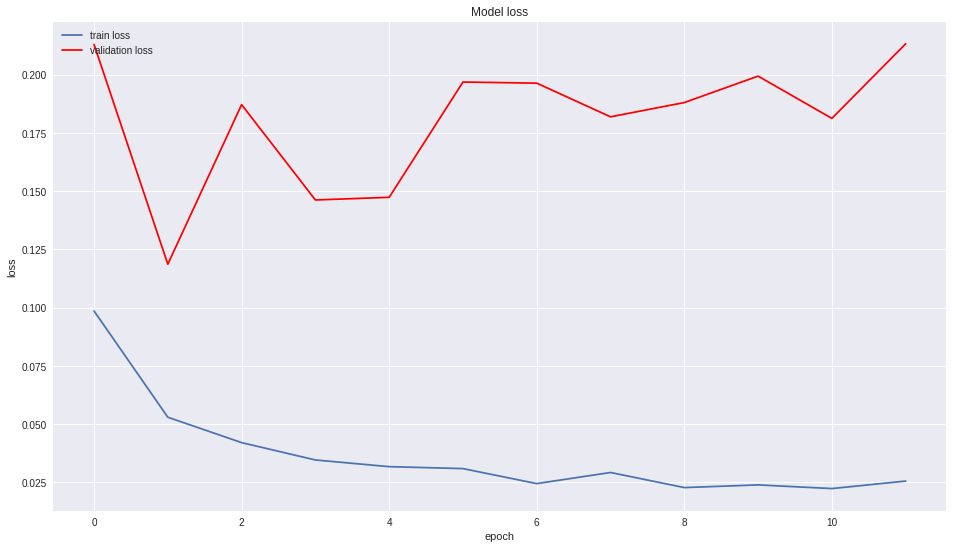

In [168]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [169]:
# Check the model summary
Trained_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_12 (Bidirectio (None, 90, 300)           193200    
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 100)               140400    
_________________________________________________________________
dense_12 (Dense)             (None, 20)                2020      
_________________________________________________________________
dropout_6 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 335,641
Trainable params: 335,641
Non-trainable params: 0
_________________________________________________________________


In [170]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-0.6547025]]


In [171]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(548, 1)


In [172]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[2836.7927]
(548, 1)


In [173]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(548).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.79061269]
KGE' is : [0.74900546]
r is : [0.96786699], gamma is : [0.99355238]
KGE is : [0.65223824]
alpha is : [1.24079359], beta is : [1.24884565]
PBIAS is : [-24.88456538]
RMSE is : 2613.861276790142
MARE is : [0.30708343]
MSE is : 6832270.774302989
MAE is : 1887.0654816413378
MAPE is : 44.07865248963554
R2 is : 0.7906126899744148



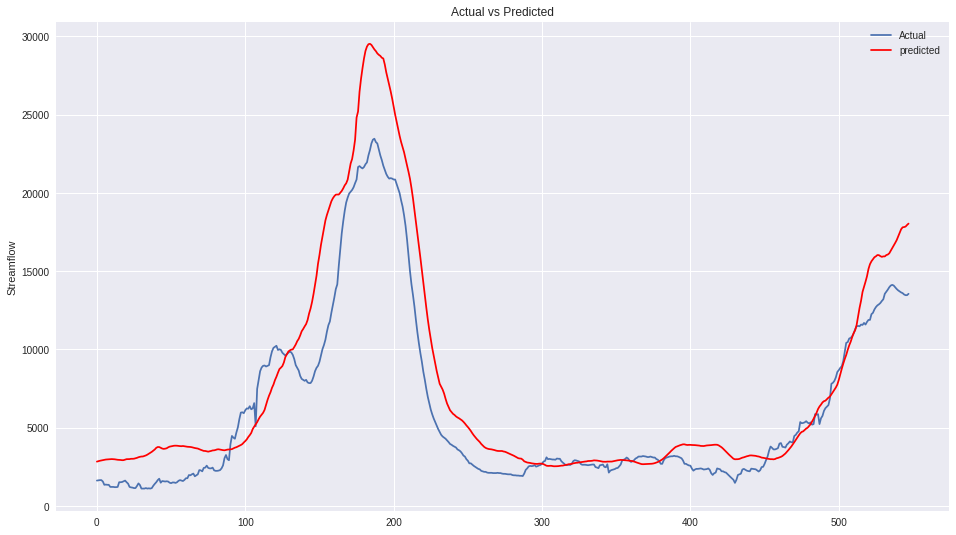

In [174]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [175]:
fn1 = '/home/jefire/project/water/input/era5_lokoja_q_deep_learning_multivariate_data.csv'

In [176]:
df = pd.read_csv(fn1)
df

,date,Pt-44,Rt-82,Tt-128,Tavgt-201,Q
0,2010-01-01,0.006257,44.978866,28.987926,28.117374,3812.4
1,2010-01-02,0.000968,42.443849,29.642680,28.082433,3654.0
2,2010-01-03,0.005424,39.972693,29.432682,28.046663,3548.4
3,2010-01-04,0.000197,37.152857,28.161370,28.009195,3425.2
4,2010-01-05,0.000059,35.697757,27.521034,27.966300,3390.0
...,...,...,...,...,...,...
4348,2021-11-27,0.352042,97.641744,29.345806,29.965836,3987.0
4349,2021-11-28,0.098219,94.719368,28.599916,29.935368,3817.0
4350,2021-11-29,0.880329,92.119963,28.538593,29.903788,3733.0
4351,2021-11-30,1.617189,87.997251,29.750315,29.869879,3733.0


In [177]:
# make a copy of the Dataframe
df_copy = df.copy()
df_copy

,date,Pt-44,Rt-82,Tt-128,Tavgt-201,Q
0,2010-01-01,0.006257,44.978866,28.987926,28.117374,3812.4
1,2010-01-02,0.000968,42.443849,29.642680,28.082433,3654.0
2,2010-01-03,0.005424,39.972693,29.432682,28.046663,3548.4
3,2010-01-04,0.000197,37.152857,28.161370,28.009195,3425.2
4,2010-01-05,0.000059,35.697757,27.521034,27.966300,3390.0
...,...,...,...,...,...,...
4348,2021-11-27,0.352042,97.641744,29.345806,29.965836,3987.0
4349,2021-11-28,0.098219,94.719368,28.599916,29.935368,3817.0
4350,2021-11-29,0.880329,92.119963,28.538593,29.903788,3733.0
4351,2021-11-30,1.617189,87.997251,29.750315,29.869879,3733.0


In [178]:
# convert to datetime object
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = False)
df_copy

,date,Pt-44,Rt-82,Tt-128,Tavgt-201,Q
0,2010-01-01,0.006257,44.978866,28.987926,28.117374,3812.4
1,2010-01-02,0.000968,42.443849,29.642680,28.082433,3654.0
2,2010-01-03,0.005424,39.972693,29.432682,28.046663,3548.4
3,2010-01-04,0.000197,37.152857,28.161370,28.009195,3425.2
4,2010-01-05,0.000059,35.697757,27.521034,27.966300,3390.0
...,...,...,...,...,...,...
4348,2021-11-27,0.352042,97.641744,29.345806,29.965836,3987.0
4349,2021-11-28,0.098219,94.719368,28.599916,29.935368,3817.0
4350,2021-11-29,0.880329,92.119963,28.538593,29.903788,3733.0
4351,2021-11-30,1.617189,87.997251,29.750315,29.869879,3733.0


In [179]:
# get summary statistics
df_copy.describe()

,Pt-44,Rt-82,Tt-128,Tavgt-201,Q
count,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000
mean,1.438453,118.055891,28.365067,28.368000,6796.001334
std,1.930652,116.166529,3.259105,1.488006,6204.694047
min,0.000000,0.142969,17.717693,25.897066,820.640000
25%,0.016127,11.939056,26.474867,26.968787,2642.000000
50%,0.609249,74.426553,28.824322,28.295894,3548.400000
75%,2.222483,218.675064,30.745438,29.833981,9174.989600
max,13.186475,373.472379,34.878845,30.764437,31692.000000


In [180]:
# get datetime statistics
df_copy.date.describe()

<ipython-input-180-230b203a077f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.date.describe()


count                    4353
unique                   4353
top       2010-01-01 00:00:00
freq                        1
first     2010-01-01 00:00:00
last      2021-12-01 00:00:00
Name: date, dtype: object

In [181]:
# set date as index
df_copy.set_index("date", inplace=True)
df_copy

,Pt-44,Rt-82,Tt-128,Tavgt-201,Q
date,,,,,
2010-01-01,0.006257,44.978866,28.987926,28.117374,3812.4
2010-01-02,0.000968,42.443849,29.642680,28.082433,3654.0
2010-01-03,0.005424,39.972693,29.432682,28.046663,3548.4
2010-01-04,0.000197,37.152857,28.161370,28.009195,3425.2
2010-01-05,0.000059,35.697757,27.521034,27.966300,3390.0
...,...,...,...,...,...
2021-11-27,0.352042,97.641744,29.345806,29.965836,3987.0
2021-11-28,0.098219,94.719368,28.599916,29.935368,3817.0
2021-11-29,0.880329,92.119963,28.538593,29.903788,3733.0


In [182]:
# Define a function to prepare multivariate data
# so that it is suitable for a time series.
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indicex = range(i-window, i)
        X.append(dataset[indicex])
        indicey = range(i-1, i-1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [183]:
# ERA5
# hold back the last two years (639 days) data to be used for testing the model
df_test = df_copy[['Pt-44', 'Rt-82', 'Tt-128', 'Tavgt-201',
'Q']].loc['2020-01-01':'2021-09-30']
df_copy.drop(df_copy.loc['2020-01-01':'2021-12-01'].index,inplace=True) # 639 days
df_copy

,Pt-44,Rt-82,Tt-128,Tavgt-201,Q
date,,,,,
2010-01-01,0.006257,44.978866,28.987926,28.117374,3812.400
2010-01-02,0.000968,42.443849,29.642680,28.082433,3654.000
2010-01-03,0.005424,39.972693,29.432682,28.046663,3548.400
2010-01-04,0.000197,37.152857,28.161370,28.009195,3425.200
2010-01-05,0.000059,35.697757,27.521034,27.966300,3390.000
...,...,...,...,...,...
2019-12-27,0.678000,68.407908,27.348043,28.417000,3877.582
2019-12-28,0.173566,63.867317,26.584631,28.372853,3842.696
2019-12-29,0.405099,60.077977,26.287436,28.330293,3825.253


In [184]:
# confirm the drop
df_copy.describe()

,Pt-44,Rt-82,Tt-128,Tavgt-201,Q
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,1.466168,120.219645,28.326120,28.328600,6987.067624
std,1.928540,116.559455,3.271674,1.487092,6340.044918
min,0.000000,0.142969,18.470629,25.897066,820.640000
25%,0.020926,12.714809,26.491793,26.943753,2703.600000
50%,0.662097,77.982618,28.820077,28.266057,3618.800000
75%,2.301841,219.964221,30.660097,29.782179,9545.761750
max,13.028830,373.472379,34.878845,30.764437,31692.000000


In [185]:
# Display Pipeline
set_config(display='diagram')

In [186]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,4))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', StandardScaler(),slice(0,4))
    ],remainder='passthrough')

In [187]:
pipe = Pipeline([('trf1', trf1),('trf2', trf2)])

In [188]:
# ERA5
#fit data
pipe.fit(df_copy[['Pt-44', 'Rt-82', 'Tt-128', 'Tavgt-201']])

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  slice(0, 4, None))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 4, None))]))])

In [189]:
# ERA5
# apply transform to train dataset
dataX = pipe.transform(df_copy[['Pt-44', 'Rt-82', 'Tt-128', 'Tavgt-201']])

dataX[0]

array([-0.5878112 , -0.23804046,  0.06280371, -0.05328266])

In [190]:
scaler = StandardScaler()
scaler.fit(df_copy[['Q']])

StandardScaler()

In [191]:
# Let’s standardize data
dataY = scaler.transform(df_copy[['Q']])
dataY

array([[-0.50080124],
       [-0.52578871],
       [-0.54244703],
       ...,
       [-0.49877369],
       [-0.50152531],
       [-0.50702855]])

In [192]:
# let’s allow the model to see / train on the past 91 days of data 
# and try to forecast the next 1 day of results. Hence, use horizon = 1
# This is called Single step Forecast
hist_window = 90 #91
horizon = 1
TRAIN_SPLIT = 2809 # 2737 # 2326 # 2809
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])
print(len(x_train_multi))
print(len(x_val_multi))

Single window of past history
[[-0.5878112  -0.23804046  0.06280371 -0.05328266]
 [-0.75804119 -0.25530264  0.31646975 -0.06709518]
 [-0.60110601 -0.27585813  0.24040065 -0.08139273]
 [-0.94376573 -0.30621401 -0.26743599 -0.09336177]
 [-1.0781175  -0.31956871 -0.46683279 -0.10868263]
 [-1.05093418 -0.33069653 -0.42437716 -0.12530202]
 [-1.05585572 -0.3385482  -0.43936555 -0.13832773]
 [-1.01463045 -0.34829836 -0.59115609 -0.14837428]
 [-1.05924408 -0.36036255 -0.54769054 -0.15867286]
 [-1.26817588 -0.39549965 -0.44231457 -0.17341863]
 [-0.77454572 -0.43763032 -0.27803326 -0.19110952]
 [-0.76416819 -0.46556611 -0.18992369 -0.20647328]
 [-0.88132739 -0.50494937 -0.08301534 -0.21766531]
 [-1.14855622 -0.53703299  0.26943223 -0.22907763]
 [-1.20057662 -0.56691441  0.35706912 -0.24435899]
 [-1.14301564 -0.59054644  0.1705542  -0.25906058]
 [-1.32008204 -0.61479518 -0.03120112 -0.27175088]
 [-0.96723359 -0.69005541  0.20879295 -0.28692687]
 [-1.02231842 -0.74369926  0.27268161 -0.30485588]
 

In [193]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [194]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
tf.keras.layers.Dense(20, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [195]:
# ERA5
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/lokoja_models/lokoja_q/Bidirectional_LSTM_Multi_Lokoja_Q_1step_90days_era5_relu.h5'

In [196]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 18s 90ms/step - loss: 0.2278 - val_loss: 0.1124
Epoch 2/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0862 - val_loss: 0.1270
Epoch 3/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0645 - val_loss: 0.1461
Epoch 4/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0597 - val_loss: 0.1805
Epoch 5/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0493 - val_loss: 0.1660
Epoch 6/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0375 - val_loss: 0.1955
Epoch 7/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0349 - val_loss: 0.1279
Epoch 8/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0310 - val_loss: 0.2262
Epoch 9/100
150/150 [==============================] - 12s 81ms/step - loss: 0.0328 - val_loss: 0.1781
Epoch 10/100
150/150 [==============================] - 12s 81ms/step - l

In [197]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

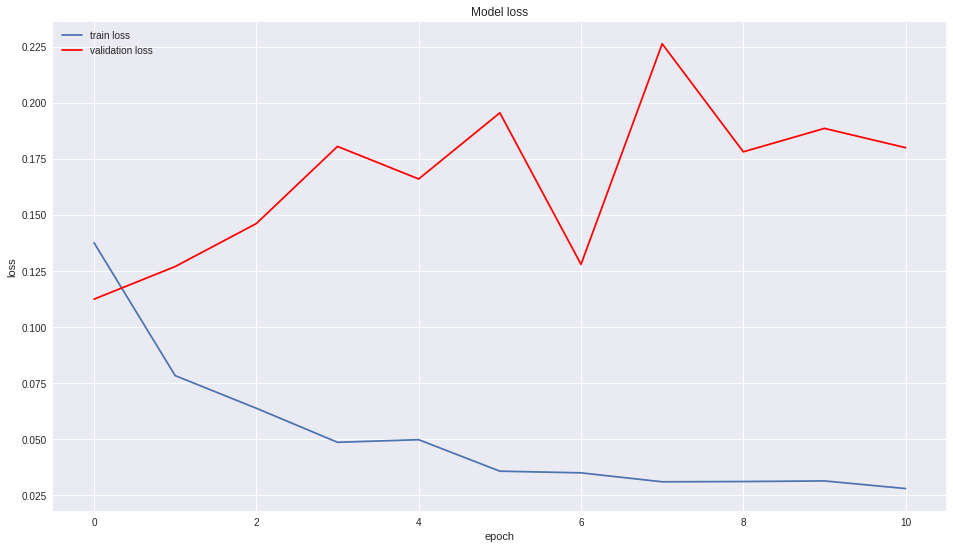

In [198]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [199]:
# ERA5
# hold back 548 days data from test DataFrame to be used for testing the model
# validate DataFrame
validate = df_test[['Pt-44', 'Rt-82', 'Tt-128', 'Tavgt-201',
'Q']].tail(548)

In [200]:
# ERA5
# apply transform to test dataset
validateX = pipe.transform(df_test[['Pt-44', 'Rt-82', 'Tt-128',
'Tavgt-201']])

validateX[0]

array([-0.48383131, -0.21188526, -0.78727046, -0.0310611 ])

In [201]:
# Let’s standardize data
validateY = scaler.transform(df_test[['Q']])
validateY[0]

array([-0.51253179])

In [202]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(len(x_test_multi))

Single window of past history
[[-0.48383131 -0.21188526 -0.78727046 -0.0310611 ]
 [-0.68682117 -0.23459271 -0.71216304 -0.05972194]
 [-0.3515499  -0.24968828 -0.67528175 -0.08388596]
 [-0.46378541 -0.25736285 -0.64594382 -0.11009989]
 [-0.35934796 -0.27839554 -0.57490015 -0.13721454]
 [-0.55775033 -0.29879827 -0.21177136 -0.16474886]
 [-0.42099526 -0.31486088  0.02675629 -0.18874043]
 [-0.60982206 -0.34348195 -0.3001649  -0.21004082]
 [-0.63805768 -0.37390929  0.1106289  -0.22653381]
 [-0.71405267 -0.39378979  0.23814467 -0.24273101]
 [-0.71977843 -0.42502224  0.270822   -0.25995518]
 [-0.78309123 -0.46266607  0.21537451 -0.27476924]
 [-0.80589524 -0.49154544 -0.22333827 -0.2913031 ]
 [-0.9164719  -0.5138913   0.01485449 -0.31126811]
 [-0.82800976 -0.54291102 -0.13213671 -0.33100439]
 [-0.80882161 -0.59223935  0.15716089 -0.35078678]
 [-0.79203651 -0.68034264  0.31830203 -0.37412958]
 [-0.90614501 -0.77079543  0.32936462 -0.39970611]
 [-0.71543971 -0.80620161  0.38192936 -0.42543026]
 

In [203]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-0.59572524]]


In [204]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(548, 1)


In [205]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[3210.66]
(548, 1)


In [206]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(548).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.92869184]
KGE' is : [0.87017202]
r is : [0.97115706], gamma is : [0.87591711]
KGE is : [0.84907455]
alpha is : [0.85398716], beta is : [0.97496352]
PBIAS is : [2.50364839]
RMSE is : 1525.376264637678
MARE is : [0.19569008]
MSE is : 2326772.748719996
MAE is : 1202.5396543075672
MAPE is : 30.24994592575353
R2 is : 0.9286918357030398



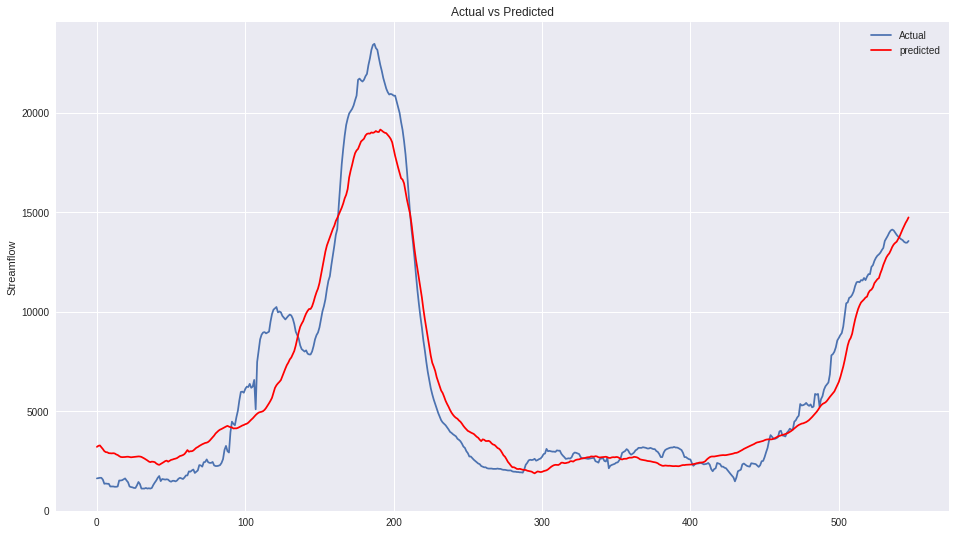

In [207]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [208]:
# save ERA5 train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/lokoja_models/lokoja_q/Bidirectional_LSTM_Multi_Lokoja_Q_1step_90days_era5_relu.csv', index=False)

In [209]:
fn = '/home/jefire/project/water/input/gpm_lokoja_q_deep_learning_multivariate_data.csv'

In [210]:
# ERA5
# apply transform to test dataset
validateX = pipe.transform(df_test[['Pt-44', 'Rt-82', 'Tt-128',
'Tavgt-201']])

validateX[0]
len(validateX)

639

In [211]:
# Let’s standardize data
validateY = scaler.transform(df_test[['Q']])
validateY[0]
len(validateY)

639

In [212]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(len(x_test_multi))

Single window of past history
[[-0.48383131 -0.21188526 -0.78727046 -0.0310611 ]
 [-0.68682117 -0.23459271 -0.71216304 -0.05972194]
 [-0.3515499  -0.24968828 -0.67528175 -0.08388596]
 [-0.46378541 -0.25736285 -0.64594382 -0.11009989]
 [-0.35934796 -0.27839554 -0.57490015 -0.13721454]
 [-0.55775033 -0.29879827 -0.21177136 -0.16474886]
 [-0.42099526 -0.31486088  0.02675629 -0.18874043]
 [-0.60982206 -0.34348195 -0.3001649  -0.21004082]
 [-0.63805768 -0.37390929  0.1106289  -0.22653381]
 [-0.71405267 -0.39378979  0.23814467 -0.24273101]
 [-0.71977843 -0.42502224  0.270822   -0.25995518]
 [-0.78309123 -0.46266607  0.21537451 -0.27476924]
 [-0.80589524 -0.49154544 -0.22333827 -0.2913031 ]
 [-0.9164719  -0.5138913   0.01485449 -0.31126811]
 [-0.82800976 -0.54291102 -0.13213671 -0.33100439]
 [-0.80882161 -0.59223935  0.15716089 -0.35078678]
 [-0.79203651 -0.68034264  0.31830203 -0.37412958]
 [-0.90614501 -0.77079543  0.32936462 -0.39970611]
 [-0.71543971 -0.80620161  0.38192936 -0.42543026]
 

In [213]:
len(df_test)

639

In [215]:
df_test = df[['Pt-44', 'Rt-82', 'Tt-128', 'Tavgt-201',
'Q']].loc['2020-01-01':'2021-12-01']

In [216]:
# ERA5
# apply transform to test dataset
validateX = pipe.transform(df_test[['Pt-44', 'Rt-82', 'Tt-128',
'Tavgt-201']])

validateX[0]
len(validateX)

1

In [217]:
df_test = df[['Pt-44', 'Rt-82', 'Tt-128', 'Tavgt-201',
'Q']].loc['2020-01-01':'2021-12-01']
len(df_test)

1

In [218]:
# make a copy of the Dataframe
#df_copy = df.copy()
len(df_copy)

3652

In [219]:
# make a copy of the Dataframe
df_copy = df.copy()
df_copy

,date,Pt-44,Rt-82,Tt-128,Tavgt-201,Q
0,2010-01-01,0.006257,44.978866,28.987926,28.117374,3812.4
1,2010-01-02,0.000968,42.443849,29.642680,28.082433,3654.0
2,2010-01-03,0.005424,39.972693,29.432682,28.046663,3548.4
3,2010-01-04,0.000197,37.152857,28.161370,28.009195,3425.2
4,2010-01-05,0.000059,35.697757,27.521034,27.966300,3390.0
...,...,...,...,...,...,...
4348,2021-11-27,0.352042,97.641744,29.345806,29.965836,3987.0
4349,2021-11-28,0.098219,94.719368,28.599916,29.935368,3817.0
4350,2021-11-29,0.880329,92.119963,28.538593,29.903788,3733.0
4351,2021-11-30,1.617189,87.997251,29.750315,29.869879,3733.0


In [220]:
# convert to datetime object
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = False)
df_copy

,date,Pt-44,Rt-82,Tt-128,Tavgt-201,Q
0,2010-01-01,0.006257,44.978866,28.987926,28.117374,3812.4
1,2010-01-02,0.000968,42.443849,29.642680,28.082433,3654.0
2,2010-01-03,0.005424,39.972693,29.432682,28.046663,3548.4
3,2010-01-04,0.000197,37.152857,28.161370,28.009195,3425.2
4,2010-01-05,0.000059,35.697757,27.521034,27.966300,3390.0
...,...,...,...,...,...,...
4348,2021-11-27,0.352042,97.641744,29.345806,29.965836,3987.0
4349,2021-11-28,0.098219,94.719368,28.599916,29.935368,3817.0
4350,2021-11-29,0.880329,92.119963,28.538593,29.903788,3733.0
4351,2021-11-30,1.617189,87.997251,29.750315,29.869879,3733.0


In [221]:
# get datetime statistics
df_copy.date.describe()

<ipython-input-221-230b203a077f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.date.describe()


count                    4353
unique                   4353
top       2010-01-01 00:00:00
freq                        1
first     2010-01-01 00:00:00
last      2021-12-01 00:00:00
Name: date, dtype: object

In [222]:
# set date as index
df_copy.set_index("date", inplace=True)
df_copy

,Pt-44,Rt-82,Tt-128,Tavgt-201,Q
date,,,,,
2010-01-01,0.006257,44.978866,28.987926,28.117374,3812.4
2010-01-02,0.000968,42.443849,29.642680,28.082433,3654.0
2010-01-03,0.005424,39.972693,29.432682,28.046663,3548.4
2010-01-04,0.000197,37.152857,28.161370,28.009195,3425.2
2010-01-05,0.000059,35.697757,27.521034,27.966300,3390.0
...,...,...,...,...,...
2021-11-27,0.352042,97.641744,29.345806,29.965836,3987.0
2021-11-28,0.098219,94.719368,28.599916,29.935368,3817.0
2021-11-29,0.880329,92.119963,28.538593,29.903788,3733.0


In [223]:
# ERA5
# hold back the last two years (639 days) data to be used for testing the model
df_test = df_copy[['Pt-44', 'Rt-82', 'Tt-128', 'Tavgt-201',
'Q']].loc['2020-01-01':'2021-12-01']
df_copy.drop(df_copy.loc['2020-01-01':'2021-12-01'].index,inplace=True) # 639 days
df_copy

,Pt-44,Rt-82,Tt-128,Tavgt-201,Q
date,,,,,
2010-01-01,0.006257,44.978866,28.987926,28.117374,3812.400
2010-01-02,0.000968,42.443849,29.642680,28.082433,3654.000
2010-01-03,0.005424,39.972693,29.432682,28.046663,3548.400
2010-01-04,0.000197,37.152857,28.161370,28.009195,3425.200
2010-01-05,0.000059,35.697757,27.521034,27.966300,3390.000
...,...,...,...,...,...
2019-12-27,0.678000,68.407908,27.348043,28.417000,3877.582
2019-12-28,0.173566,63.867317,26.584631,28.372853,3842.696
2019-12-29,0.405099,60.077977,26.287436,28.330293,3825.253


In [224]:
# ERA5
# apply transform to test dataset
validateX = pipe.transform(df_test[['Pt-44', 'Rt-82', 'Tt-128',
'Tavgt-201']])

validateX[0]
len(validateX)

701

In [225]:
# Let’s standardize data
validateY = scaler.transform(df_test[['Q']])
validateY[0]
len(validateY)

701

In [226]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(len(x_test_multi))

Single window of past history
[[-0.48383131 -0.21188526 -0.78727046 -0.0310611 ]
 [-0.68682117 -0.23459271 -0.71216304 -0.05972194]
 [-0.3515499  -0.24968828 -0.67528175 -0.08388596]
 [-0.46378541 -0.25736285 -0.64594382 -0.11009989]
 [-0.35934796 -0.27839554 -0.57490015 -0.13721454]
 [-0.55775033 -0.29879827 -0.21177136 -0.16474886]
 [-0.42099526 -0.31486088  0.02675629 -0.18874043]
 [-0.60982206 -0.34348195 -0.3001649  -0.21004082]
 [-0.63805768 -0.37390929  0.1106289  -0.22653381]
 [-0.71405267 -0.39378979  0.23814467 -0.24273101]
 [-0.71977843 -0.42502224  0.270822   -0.25995518]
 [-0.78309123 -0.46266607  0.21537451 -0.27476924]
 [-0.80589524 -0.49154544 -0.22333827 -0.2913031 ]
 [-0.9164719  -0.5138913   0.01485449 -0.31126811]
 [-0.82800976 -0.54291102 -0.13213671 -0.33100439]
 [-0.80882161 -0.59223935  0.15716089 -0.35078678]
 [-0.79203651 -0.68034264  0.31830203 -0.37412958]
 [-0.90614501 -0.77079543  0.32936462 -0.39970611]
 [-0.71543971 -0.80620161  0.38192936 -0.42543026]
 

In [227]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-0.59572524]]


In [228]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(610, 1)


In [229]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[3210.66]
(610, 1)


In [ ]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [233]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[3210.66]
(610, 1)


In [246]:
# ERA5
# hold back 548 days data from test DataFrame to be used for testing the model
# validate DataFrame
validate = df_test[['Pt-44', 'Rt-82', 'Tt-128', 'Tavgt-201',
'Q']].tail(610)

In [247]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(610).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.89231106]
KGE' is : [0.8687619]
r is : [0.94592057], gamma is : [0.88334324]
KGE is : [0.88887859]
alpha is : [0.90654773], beta is : [1.02626891]
PBIAS is : [-2.62689106]
RMSE is : 1812.6614528597809
MARE is : [0.21895778]
MSE is : 3285741.5426837318
MAE is : 1384.648929934042
MAPE is : 31.09391543743928
R2 is : 0.8923110557610026



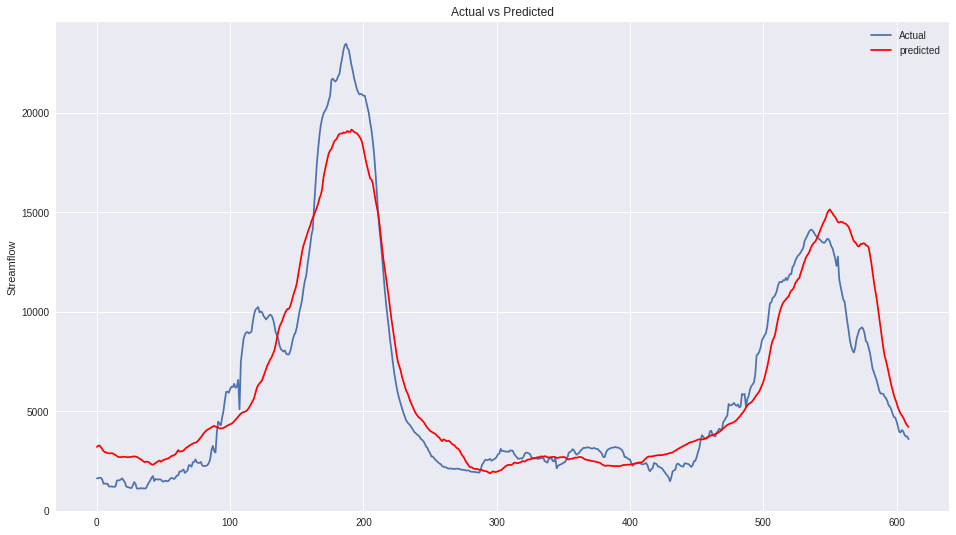

In [248]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()